In [2]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
import gc

### 데이터 준비

In [73]:
# parquet 파일 데이터를 읽어온다.
df1_train = pd.read_parquet('open/train/2.신용정보/201807_train_신용정보.parquet')
df1_test = pd.read_parquet('open/test/2.신용정보/201807_test_신용정보.parquet')
df1_test.head()

,기준년월,ID,최초한도금액,카드이용한도금액,CA한도금액,일시상환론한도금액,월상환론한도금액,CA이자율_할인전,CL이자율_할인전,RV일시불이자율_할인전,...,연체감액여부_R3M,한도심사요청건수,한도요청거절건수,한도심사요청후경과월,한도심사거절후경과월,시장단기연체여부_R6M,시장단기연체여부_R3M,시장연체상환여부_R6M,시장연체상환여부_R3M,rv최초시작후경과일
0,201807,TEST_00000,0,50902,18131,0,0,14.641712,11.894873,10.346302,...,0,0회,0,3,3,0,0,0,0,99999999
1,201807,TEST_00001,0,50080,16819,0,0,18.992879,17.600092,14.021300,...,0,0회,0,3,3,0,0,0,0,99999999
2,201807,TEST_00002,0,100045,30505,0,19499,14.823453,14.817385,10.679822,...,0,0회,0,3,3,0,0,0,0,99999999
3,201807,TEST_00003,0,18508,6402,0,156102,15.121715,15.284812,11.674446,...,0,0회,0,3,3,0,0,0,0,99999999
4,201807,TEST_00004,10000,4033,0,42195,52784,14.220050,10.897462,10.777585,...,0,0회,0,3,3,0,0,0,0,99999999


In [75]:
df2_train = pd.read_parquet('open/train/2.신용정보/201808_train_신용정보.parquet')
df2_test = pd.read_parquet('open/test/2.신용정보/201808_test_신용정보.parquet')
df3_train = pd.read_parquet('open/train/2.신용정보/201809_train_신용정보.parquet')
df3_test = pd.read_parquet('open/test/2.신용정보/201809_test_신용정보.parquet')
df4_train = pd.read_parquet('open/train/2.신용정보/201810_train_신용정보.parquet')
df4_test = pd.read_parquet('open/test/2.신용정보/201810_test_신용정보.parquet')
df5_train = pd.read_parquet('open/train/2.신용정보/201811_train_신용정보.parquet')
df5_test = pd.read_parquet('open/test/2.신용정보/201811_test_신용정보.parquet')
df6_train = pd.read_parquet('open/train/2.신용정보/201812_train_신용정보.parquet')
df6_test = pd.read_parquet('open/test/2.신용정보/201812_test_신용정보.parquet')

In [97]:
df1_test

,기준년월,ID,최초한도금액,카드이용한도금액,CA한도금액,일시상환론한도금액,월상환론한도금액,CA이자율_할인전,CL이자율_할인전,RV일시불이자율_할인전,...,연체감액여부_R3M,한도심사요청건수,한도요청거절건수,한도심사요청후경과월,한도심사거절후경과월,시장단기연체여부_R6M,시장단기연체여부_R3M,시장연체상환여부_R6M,시장연체상환여부_R3M,rv최초시작후경과일
0,201807,TEST_00000,0,50902,18131,0,0,14.641712,11.894873,10.346302,...,0,0회,0,3,3,0,0,0,0,99999999
1,201807,TEST_00001,0,50080,16819,0,0,18.992879,17.600092,14.021300,...,0,0회,0,3,3,0,0,0,0,99999999
2,201807,TEST_00002,0,100045,30505,0,19499,14.823453,14.817385,10.679822,...,0,0회,0,3,3,0,0,0,0,99999999
3,201807,TEST_00003,0,18508,6402,0,156102,15.121715,15.284812,11.674446,...,0,0회,0,3,3,0,0,0,0,99999999
4,201807,TEST_00004,10000,4033,0,42195,52784,14.220050,10.897462,10.777585,...,0,0회,0,3,3,0,0,0,0,99999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,201807,TEST_99995,0,47956,18064,0,0,14.639950,11.896555,10.249980,...,0,0회,0,3,3,0,0,0,0,99999999
99996,201807,TEST_99996,0,48500,16156,90000,153181,14.220507,14.879605,10.294439,...,0,0회,0,3,3,0,0,0,0,99999999
99997,201807,TEST_99997,0,29994,11718,89996,153302,14.692707,11.895688,10.622477,...,0,0회,0,3,3,0,0,0,0,99999999
99998,201807,TEST_99998,0,42177,17314,90000,205517,14.834554,14.831303,10.462986,...,0,0회,0,3,3,0,0,0,0,99999999


In [99]:
df1_train

,기준년월,ID,최초한도금액,카드이용한도금액,CA한도금액,일시상환론한도금액,월상환론한도금액,CA이자율_할인전,CL이자율_할인전,RV일시불이자율_할인전,...,연체감액여부_R3M,한도심사요청건수,한도요청거절건수,한도심사요청후경과월,한도심사거절후경과월,시장단기연체여부_R6M,시장단기연체여부_R3M,시장연체상환여부_R6M,시장연체상환여부_R3M,rv최초시작후경과일
0,201807,TRAIN_000000,0,19354,7270,0,0,22.995207,18.254978,17.264967,...,0,0회,0,3,3,0,0,0,0,99999999
1,201807,TRAIN_000001,0,9996,5718,41996,90611,14.793821,14.834873,10.622446,...,0,0회,0,3,3,0,0,0,0,322
2,201807,TRAIN_000002,0,88193,35207,0,0,22.014276,17.875321,17.155829,...,0,0회,0,3,3,0,0,0,0,2378
3,201807,TRAIN_000003,0,19062,6531,0,0,22.998014,22.999453,19.293674,...,0,0회,0,3,3,0,0,0,0,99999999
4,201807,TRAIN_000004,0,177222,47149,48000,155020,14.661948,10.897410,10.654587,...,0,0회,0,3,3,0,0,0,0,99999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,201807,TRAIN_399995,0,20281,5671,0,54826,14.644420,11.896434,10.382520,...,0,0회,0,3,3,0,0,0,0,99999999
399996,201807,TRAIN_399996,0,88205,34128,0,155656,14.861996,14.844039,10.371673,...,0,0회,0,3,3,0,0,0,0,99999999
399997,201807,TRAIN_399997,0,50651,20371,0,0,16.934232,15.584800,13.550411,...,0,0회,0,3,3,0,0,0,0,99999999
399998,201807,TRAIN_399998,0,10001,6371,89999,180886,14.635994,11.896793,10.249980,...,0,0회,0,3,3,0,0,0,0,99999999


In [77]:
# 두 데이터 프레임을 합친다.
all_df1 = pd.concat([df1_train, df1_test])
all_df1.reset_index(inplace=True, drop=True)
all_df2 = pd.concat([df2_train, df2_test])
all_df2.reset_index(inplace=True, drop=True)
all_df3 = pd.concat([df3_train, df3_test])
all_df3.reset_index(inplace=True, drop=True)
all_df4 = pd.concat([df4_train, df4_test])
all_df4.reset_index(inplace=True, drop=True)
all_df5 = pd.concat([df5_train, df5_test])
all_df5.reset_index(inplace=True, drop=True)
all_df6 = pd.concat([df6_train, df6_test])
all_df6.reset_index(inplace=True, drop=True)

In [79]:
combined_df = pd.concat([all_df1, all_df2, all_df3, all_df4, all_df5, all_df6], axis=0, ignore_index=True)

In [81]:
combined_df

,기준년월,ID,최초한도금액,카드이용한도금액,CA한도금액,일시상환론한도금액,월상환론한도금액,CA이자율_할인전,CL이자율_할인전,RV일시불이자율_할인전,...,연체감액여부_R3M,한도심사요청건수,한도요청거절건수,한도심사요청후경과월,한도심사거절후경과월,시장단기연체여부_R6M,시장단기연체여부_R3M,시장연체상환여부_R6M,시장연체상환여부_R3M,rv최초시작후경과일
0,201807,TRAIN_000000,0,19354,7270,0,0,22.995207,18.254978,17.264967,...,0,0회,0,3,3,0,0,0,0,99999999
1,201807,TRAIN_000001,0,9996,5718,41996,90611,14.793821,14.834873,10.622446,...,0,0회,0,3,3,0,0,0,0,322
2,201807,TRAIN_000002,0,88193,35207,0,0,22.014276,17.875321,17.155829,...,0,0회,0,3,3,0,0,0,0,2378
3,201807,TRAIN_000003,0,19062,6531,0,0,22.998014,22.999453,19.293674,...,0,0회,0,3,3,0,0,0,0,99999999
4,201807,TRAIN_000004,0,177222,47149,48000,155020,14.661948,10.897410,10.654587,...,0,0회,0,3,3,0,0,0,0,99999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,201812,TEST_99995,0,0,0,0,0,14.642972,11.898260,10.674317,...,0,0회,0,3,3,0,0,0,0,99999999
2999996,201812,TEST_99996,0,49025,17876,48022,152797,14.221370,14.901302,10.324015,...,0,0회,0,3,3,0,0,0,0,99999999
2999997,201812,TEST_99997,0,29996,13332,89997,156313,15.207480,11.902432,11.495748,...,0,0회,0,3,3,0,0,0,0,99999999
2999998,201812,TEST_99998,0,42610,17362,90003,204480,15.268772,15.299862,11.264263,...,0,0회,0,3,3,0,0,0,0,99999999


In [87]:
combined_df.columns

Index(['기준년월', 'ID', '최초한도금액', '카드이용한도금액', 'CA한도금액', '일시상환론한도금액', '월상환론한도금액',
       'CA이자율_할인전', 'CL이자율_할인전', 'RV일시불이자율_할인전', 'RV현금서비스이자율_할인전', 'RV신청일자',
       'RV약정청구율', 'RV최소결제비율', '자발한도감액횟수_R12M', '자발한도감액금액_R12M', '자발한도감액후경과월',
       '강제한도감액횟수_R12M', '강제한도감액금액_R12M', '강제한도감액후경과월', '한도증액횟수_R12M',
       '한도증액금액_R12M', '한도증액후경과월', '상향가능한도금액', '상향가능CA한도금액', '카드론동의여부',
       '월상환론상향가능한도금액', 'RV전환가능여부', '일시불ONLY전환가능여부', '카드이용한도금액_B1M',
       '카드이용한도금액_B2M', '특별한도보유여부_R3M', '연체감액여부_R3M', '한도심사요청건수', '한도요청거절건수',
       '한도심사요청후경과월', '한도심사거절후경과월', '시장단기연체여부_R6M', '시장단기연체여부_R3M',
       '시장연체상환여부_R6M', '시장연체상환여부_R3M', 'rv최초시작후경과일'],
      dtype='object')

In [89]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 42 columns):
 #   Column          Dtype  
---  ------          -----  
 0   기준년월            int64  
 1   ID              object 
 2   최초한도금액          int64  
 3   카드이용한도금액        int64  
 4   CA한도금액          int64  
 5   일시상환론한도금액       int64  
 6   월상환론한도금액        int64  
 7   CA이자율_할인전       float64
 8   CL이자율_할인전       float64
 9   RV일시불이자율_할인전    float64
 10  RV현금서비스이자율_할인전  float64
 11  RV신청일자          float64
 12  RV약정청구율         float64
 13  RV최소결제비율        float64
 14  자발한도감액횟수_R12M   object 
 15  자발한도감액금액_R12M   int64  
 16  자발한도감액후경과월      int64  
 17  강제한도감액횟수_R12M   int64  
 18  강제한도감액금액_R12M   int64  
 19  강제한도감액후경과월      int64  
 20  한도증액횟수_R12M     object 
 21  한도증액금액_R12M     int64  
 22  한도증액후경과월        int64  
 23  상향가능한도금액        int64  
 24  상향가능CA한도금액      int64  
 25  카드론동의여부         object 
 26  월상환론상향가능한도금액    int64  
 27  RV전환가능여부        object 
 28  일시불ONLY전환가능여

In [91]:
combined_df.isna().sum()

기준년월                    0
ID                      0
최초한도금액                  0
카드이용한도금액                0
CA한도금액                  0
일시상환론한도금액               0
월상환론한도금액                0
CA이자율_할인전               0
CL이자율_할인전               0
RV일시불이자율_할인전            0
RV현금서비스이자율_할인전          0
RV신청일자            2438754
RV약정청구율                 0
RV최소결제비율                0
자발한도감액횟수_R12M           0
자발한도감액금액_R12M           0
자발한도감액후경과월              0
강제한도감액횟수_R12M           0
강제한도감액금액_R12M           0
강제한도감액후경과월              0
한도증액횟수_R12M             0
한도증액금액_R12M             0
한도증액후경과월                0
상향가능한도금액                0
상향가능CA한도금액              0
카드론동의여부                 0
월상환론상향가능한도금액            0
RV전환가능여부            37107
일시불ONLY전환가능여부           0
카드이용한도금액_B1M            0
카드이용한도금액_B2M            0
특별한도보유여부_R3M            0
연체감액여부_R3M              0
한도심사요청건수                0
한도요청거절건수                0
한도심사요청후경과월              0
한도심사거절후경과월              0
시장단기연체여부_R6M            0
시장단기연체여부_R3M

### ID
- 고유 ID값

중복된 값이 2500000개 존재

In [95]:
combined_df['ID'].duplicated().sum()

2500000

### 최초한도금액

In [11]:
combined_df['최초한도금액'].value_counts()

최초한도금액
0        2071284
9998       38748
9997       30282
9999       25926
9996       13056
          ...   
41355          6
40310          6
33508          6
33386          6
43254          6
Name: count, Length: 8802, dtype: int64

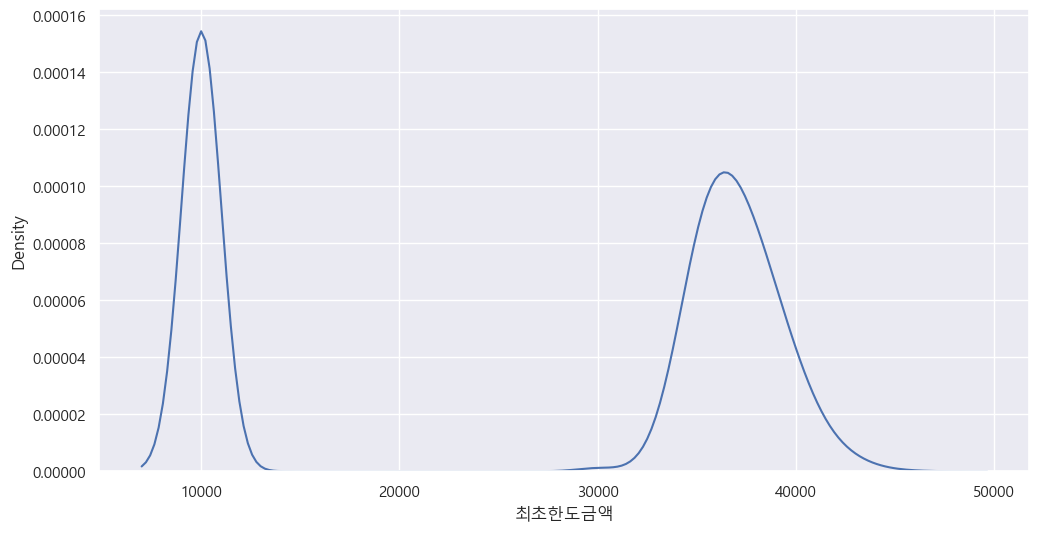

In [467]:

a1 = combined_df.query('최초한도금액 > 0.0')
sns.kdeplot(data=a1, x='최초한도금액')
plt.show()


In [469]:
a1['최초한도금액'].describe()

count    411078.000000
mean      26567.457242
std       13287.166790
min        9992.000000
25%        9998.000000
50%       35110.000000
75%       37367.000000
max       46658.000000
Name: 최초한도금액, dtype: float64

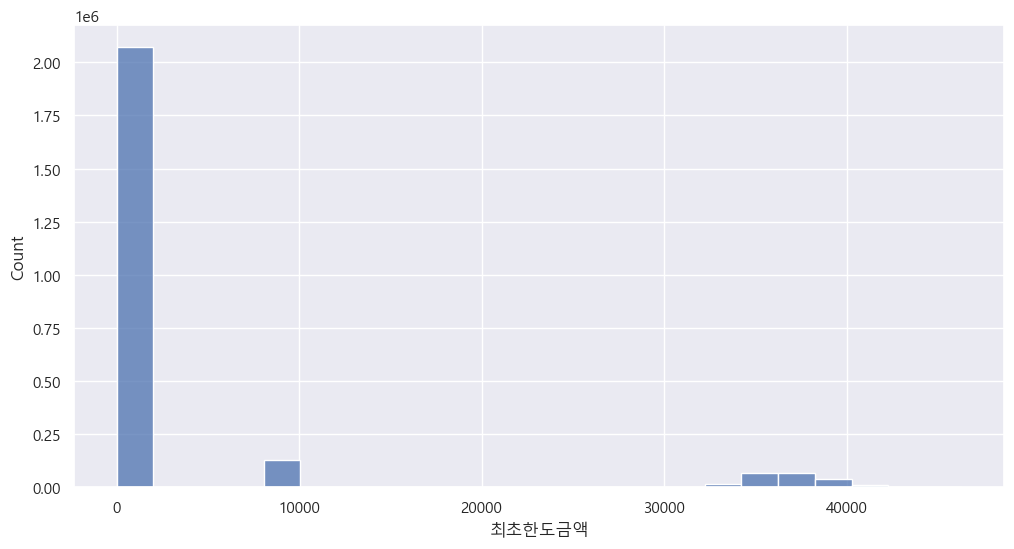

In [12]:
sns.histplot(data=combined_df, x='최초한도금액')
plt.show()

In [193]:
combined_df['최초한도금액'].describe()

count    3.000000e+06
mean     3.640432e+03
std      1.037574e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.665800e+04
Name: 최초한도금액, dtype: float64

- 최초 한도금액 0원인 사람이 가장 많다.
- 0 이외에 10000과 37000쪽에 주로 분포하고 있다. 
- 평균은 26567.457

### 카드이용한도금액

In [13]:
combined_df['카드이용한도금액'].value_counts()

카드이용한도금액
0         98003
9999      37990
10000     37990
9998      33190
10001     32356
          ...  
213480        1
219823        1
16078         1
205989        1
176500        1
Name: count, Length: 81852, dtype: int64

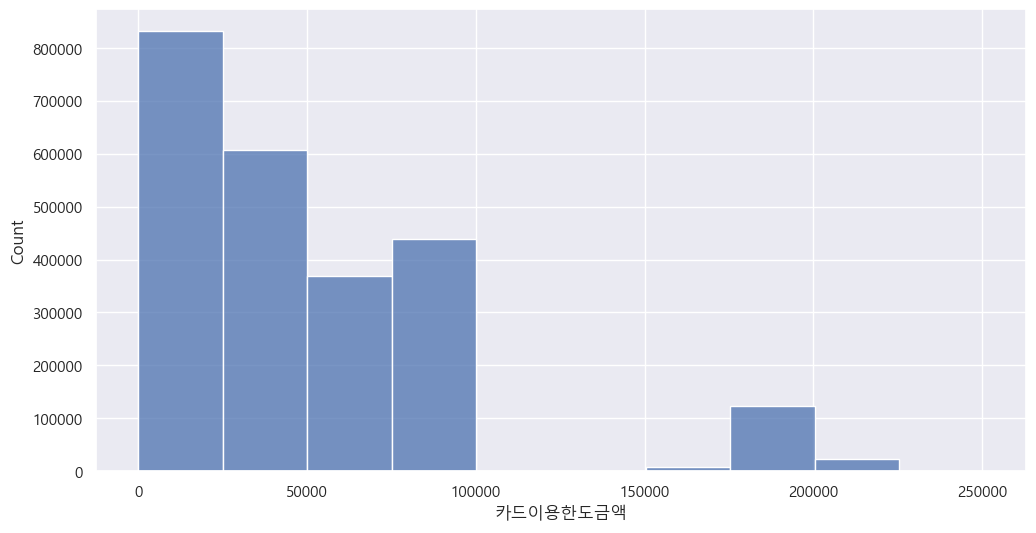

In [36]:
sns.histplot(data=combined_df, x='카드이용한도금액', bins = 10)
plt.show()

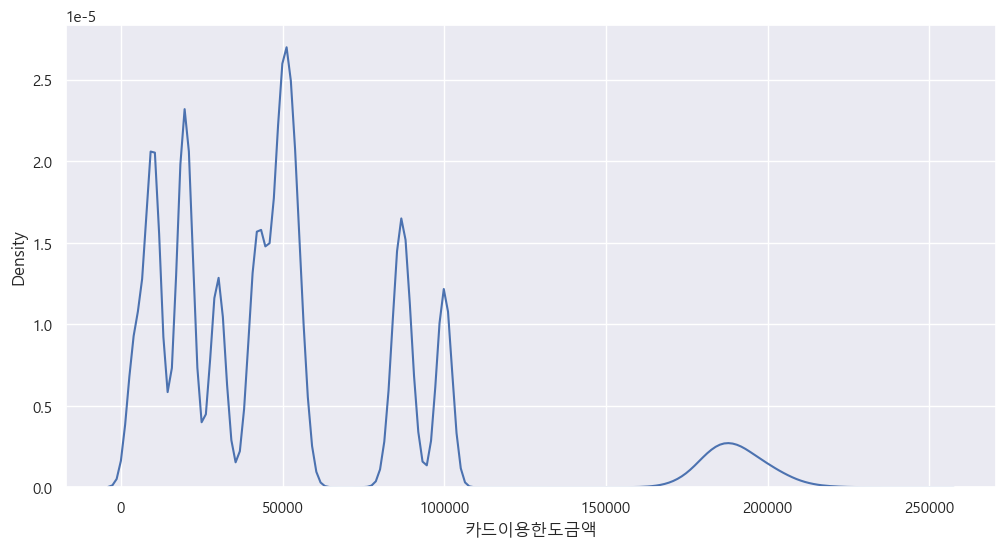

In [472]:
a1 = combined_df.query('카드이용한도금액 > 0.0')
sns.kdeplot(data=a1, x='카드이용한도금액')
plt.show()

In [478]:
a1['카드이용한도금액'].describe()

count    2.876963e+06
mean     5.381582e+04
std      4.617234e+04
min      3.127000e+03
25%      1.988700e+04
50%      4.561300e+04
75%      8.443300e+04
max      2.504630e+05
Name: 카드이용한도금액, dtype: float64

- 0원인 사람이 가장 많다
- 0 제외하면 평균은 53815

### CA한도금액
- 현금서비스 한도금액 : 0원인 사람이 가장 많다. 40000까지 숫자가 줄어든다. 

In [40]:
combined_df['CA한도금액'].value_counts()

CA한도금액
0        272956
6439        120
5622        117
6120        115
5467        114
          ...  
63885         1
45386         1
48827         1
62354         1
49956         1
Name: count, Length: 63634, dtype: int64

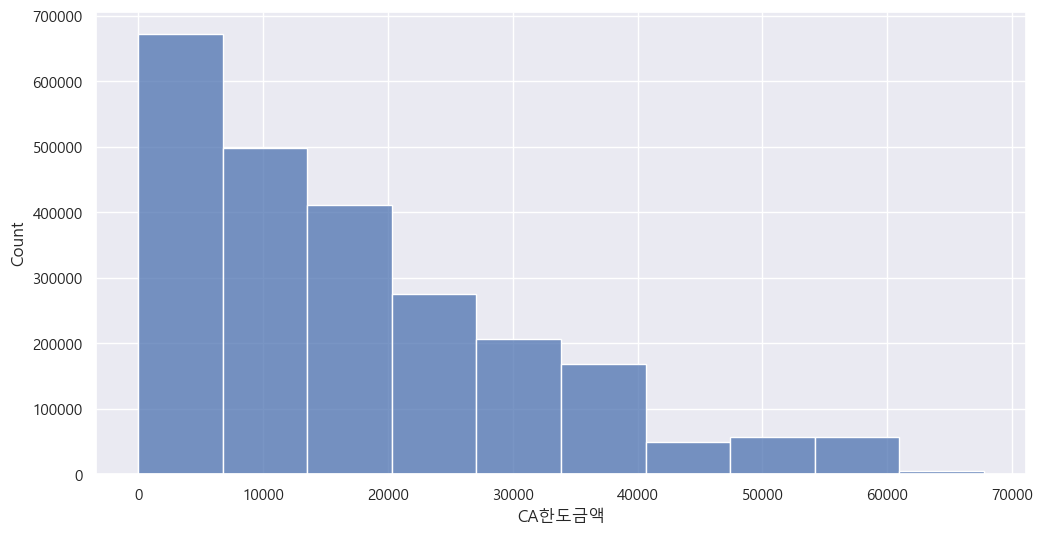

In [39]:
sns.histplot(data=combined_df, x='CA한도금액', bins = 10)
plt.show()

In [480]:
combined_df['CA한도금액'].describe()

count    3.000000e+06
mean     1.721192e+04
std      1.437300e+04
min      0.000000e+00
25%      5.927000e+03
50%      1.406400e+04
75%      2.549200e+04
max      6.774700e+04
Name: CA한도금액, dtype: float64

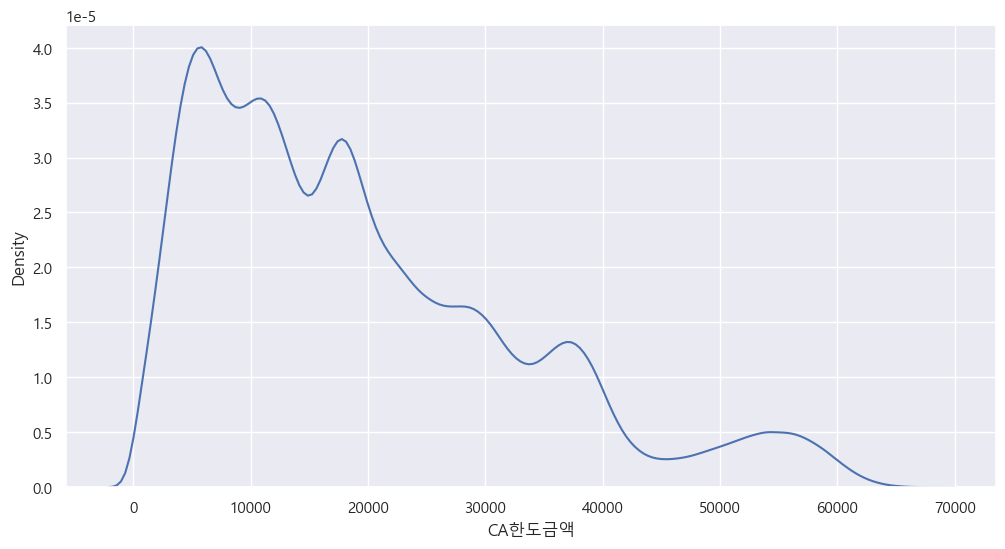

In [482]:
a1 = combined_df.query('CA한도금액 > 0.0')
sns.kdeplot(data=a1, x='CA한도금액')
plt.show()

- 0원인 사람이 가장 많다. 한도금액이 증가할 수록 도수가 줄어든다. 
- 8,000원, 12,000원, 18,000원, 30,000원, 38,000원, 50,000원 부근에서 밀도 상승이 보임
- 일부 고객은 50,000원 이상 ~ 최대 70,000원까지도 CA한도가 부여되어 있음

### CL이자율_할인전


In [53]:
combined_df['CL이자율_할인전'].value_counts()

CL이자율_할인전
22.999954    47590
10.900810       10
10.899571        9
10.899793        9
10.899819        9
             ...  
15.299758        1
14.869218        1
15.657576        1
18.016733        1
15.287120        1
Name: count, Length: 2126771, dtype: int64

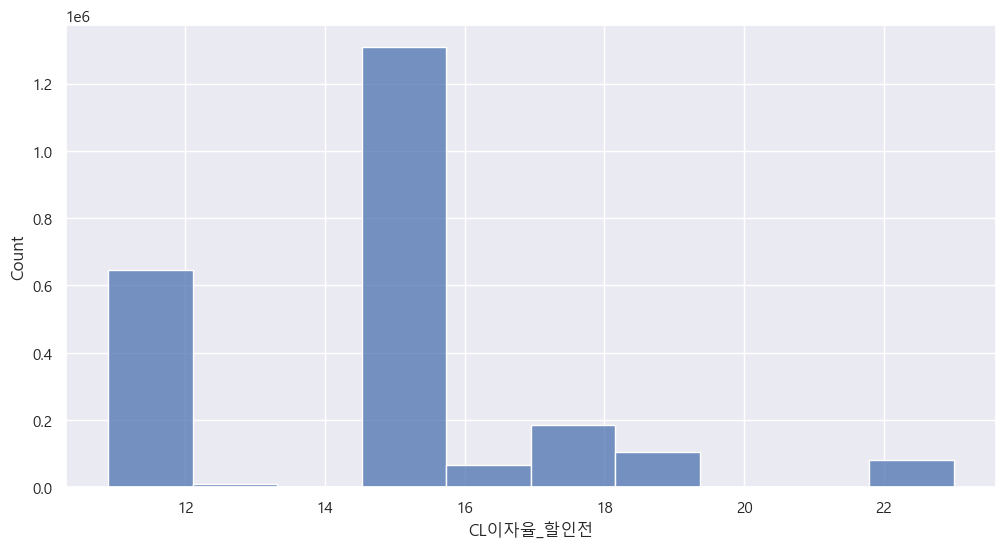

In [51]:
sns.histplot(data=combined_df, x='CL이자율_할인전', bins = 10)
plt.show()

<Axes: xlabel='CL이자율_할인전', ylabel='Density'>

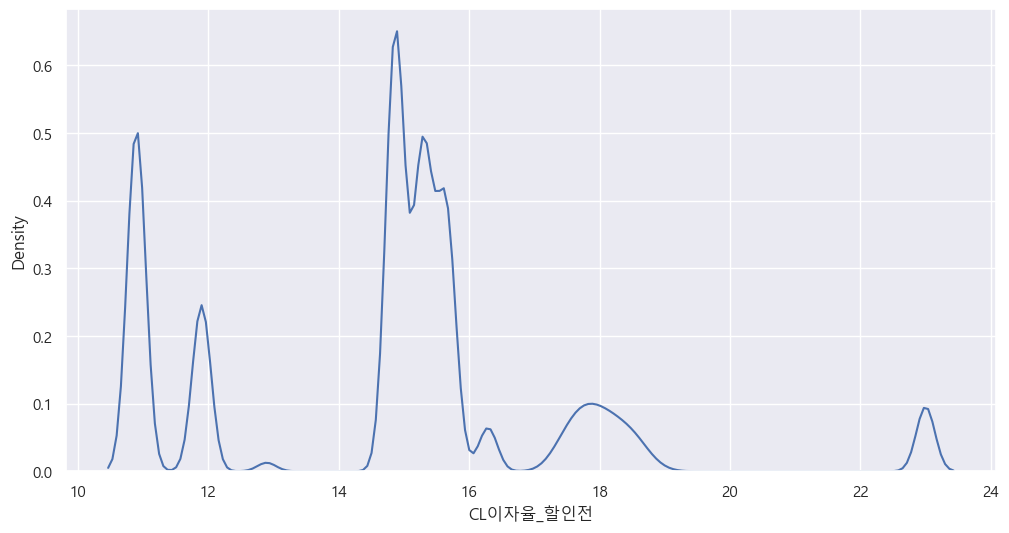

In [56]:
sns.kdeplot(data=combined_df, x='CL이자율_할인전')

- 카드론 이자율, 22.999954가 도수가 가장 많음
- 약 10.5%, 약 11.8%, 약 15.1%, 약 15.4%, 약 17.8%, 약 23%에 주로 분포함
- 15% 부근에 가장 높은 밀도가 존재 이 구간이 가장 흔한 카드론 이자율일 수 있음

### 일시상환론한도금액 : 
- 일시 상환론(단기 카드론) 한도 금액

In [107]:
combined_df['일시상환론한도금액'].value_counts()

일시상환론한도금액
0         1815090
200000     145707
90002       51122
90001       49408
90003       47255
           ...   
158239          1
158465          1
158886          1
158963          1
160316          1
Name: count, Length: 7738, dtype: int64

<Axes: xlabel='일시상환론한도금액', ylabel='Density'>

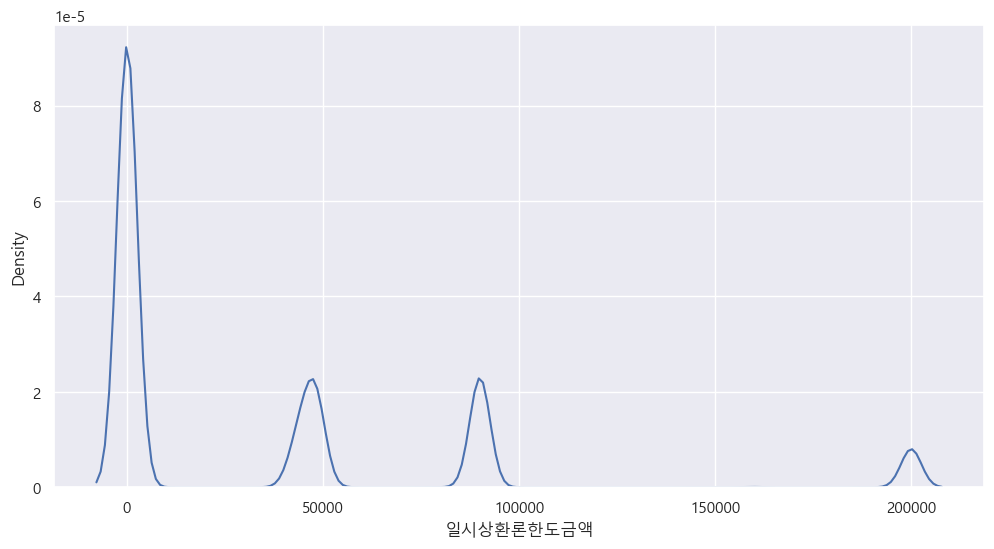

In [195]:
sns.kdeplot(data=combined_df, x='일시상환론한도금액')

In [196]:
combined_df['일시상환론한도금액'].describe()

count    3.000000e+06
mean     3.297745e+04
std      5.146564e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.800400e+04
max      2.000000e+05
Name: 일시상환론한도금액, dtype: float64

- 대부분의 고객에게 일시상환론 한도 자체가 없거나, 0으로 설정되어 있다
- 약 50,000원, 100,000원, 200,000원 부근에 뚜렷한 봉우리

### 월상환론한도금액 : 
- 월상환 카드론 한도 금액


In [113]:
combined_df['월상환론한도금액'].value_counts()

월상환론한도금액
0         1181485
250000       6936
180680        337
180686        335
180656        332
           ...   
231260          1
58531           1
101131          1
98488           1
85644           1
Name: count, Length: 66700, dtype: int64

<Axes: xlabel='월상환론한도금액', ylabel='Density'>

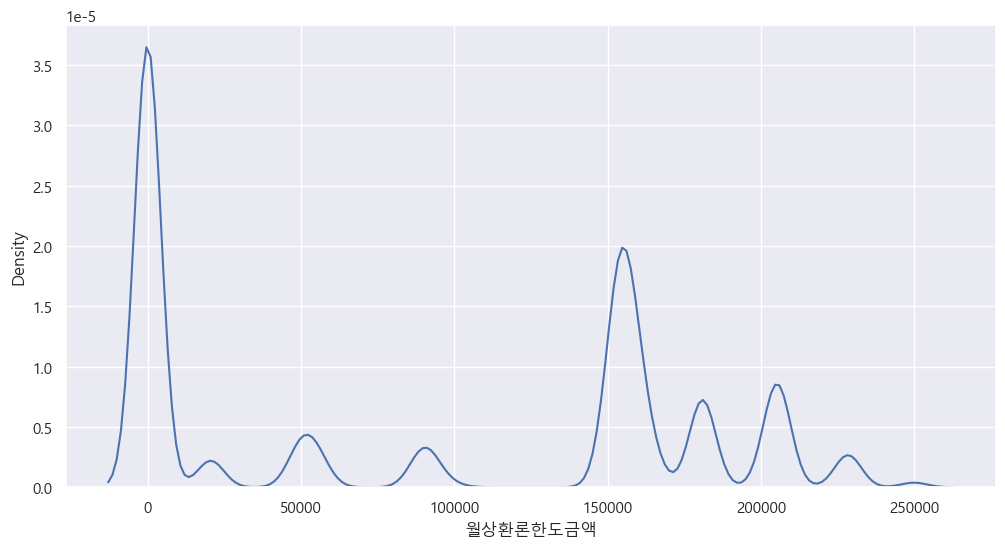

In [197]:
sns.kdeplot(data=combined_df, x='월상환론한도금액')

In [198]:
combined_df['월상환론한도금액'].describe()

count    3.000000e+06
mean     9.177658e+04
std      8.469137e+04
min      0.000000e+00
25%      0.000000e+00
50%      9.101100e+04
75%      1.597912e+05
max      2.500000e+05
Name: 월상환론한도금액, dtype: float64

- 0원이 가장 높음. 카드 고객의 다수가 월상환론 한도 자체를 보유하지 않음
- 약 50,000원, 100,000원, 150,000원, 180,000원, 200,000원, 240,000원 봉우리 존재
- 15만 이상, 최대 25만 이상까지 한도 보유 고객이 소수 존재

### CA이자율_할인전
- 현금서비스 이자율 (할인 전)

In [484]:
combined_df['CA이자율_할인전'].value_counts()

CA이자율_할인전
14.219972    299676
22.999954     42273
14.220159        13
14.220389        13
14.220260        13
              ...  
14.651632         1
17.030477         1
16.988272         1
20.073383         1
14.722716         1
Name: count, Length: 2318312, dtype: int64

<Axes: xlabel='CA이자율_할인전', ylabel='Density'>

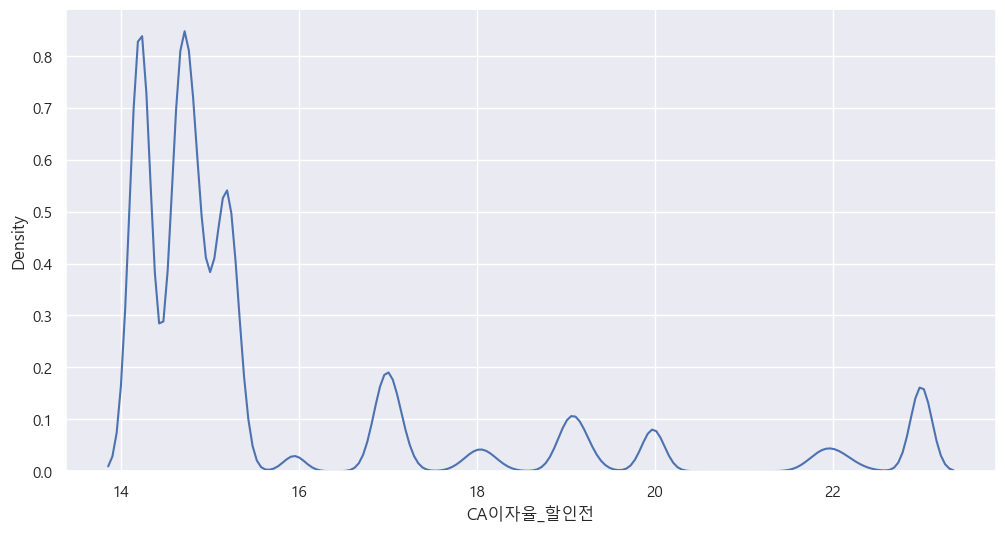

In [485]:
sns.kdeplot(data=combined_df, x='CA이자율_할인전')

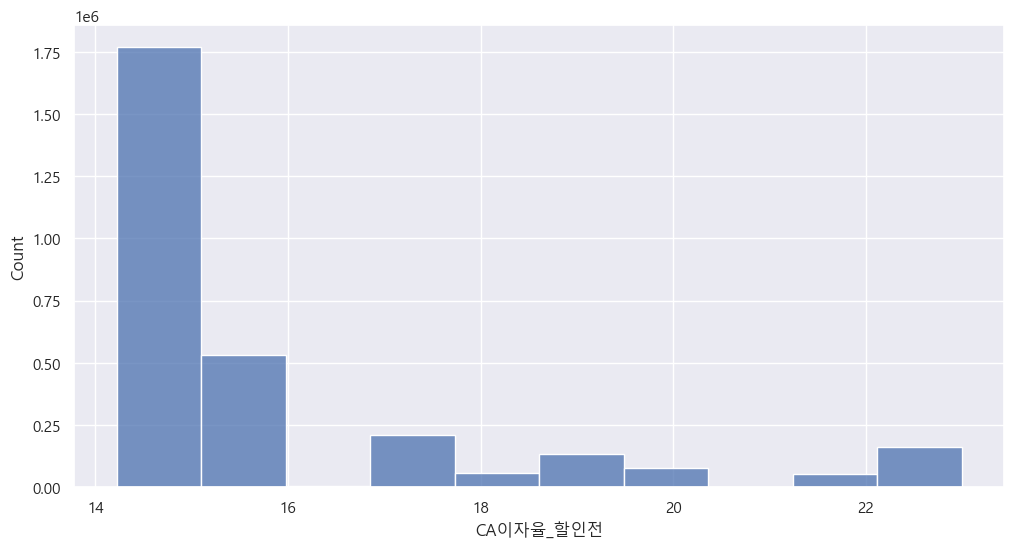

In [486]:
sns.histplot(data=combined_df, x='CA이자율_할인전', bins = 10)
plt.show()

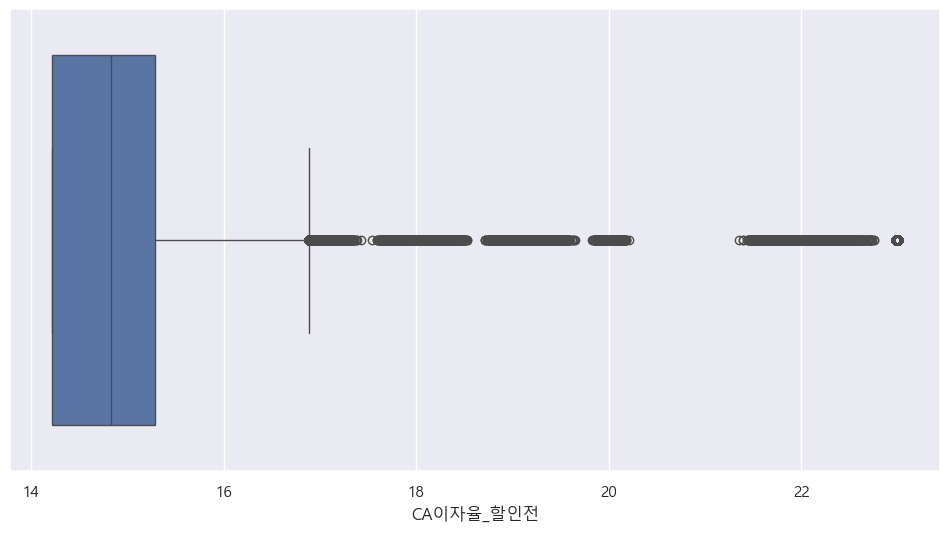

In [129]:
sns.boxplot(x=combined_df['CA이자율_할인전'])
plt.show()

In [201]:
combined_df['CA이자율_할인전'].describe()

count    3.000000e+06
mean     1.582226e+01
std      2.376463e+00
min      1.421997e+01
25%      1.422187e+01
50%      1.483088e+01
75%      1.528885e+01
max      2.299995e+01
Name: CA이자율_할인전, dtype: float64

- 14.22%에서 가장 많이 존재
- 14%대 이자율(14~15%)이 가장 많으며, 약 175만건 이상

### RV일시불이자율_할인전
- 리볼빙 일시불 이자율 (할인 전)

In [131]:
combined_df['RV일시불이자율_할인전'].value_counts()

RV일시불이자율_할인전
10.249980    414406
10.455294         7
10.565835         7
10.718235         6
10.614914         6
              ...  
14.616182         1
10.414350         1
12.864849         1
12.872942         1
11.089403         1
Name: count, Length: 2325665, dtype: int64

<Axes: xlabel='RV일시불이자율_할인전', ylabel='Density'>

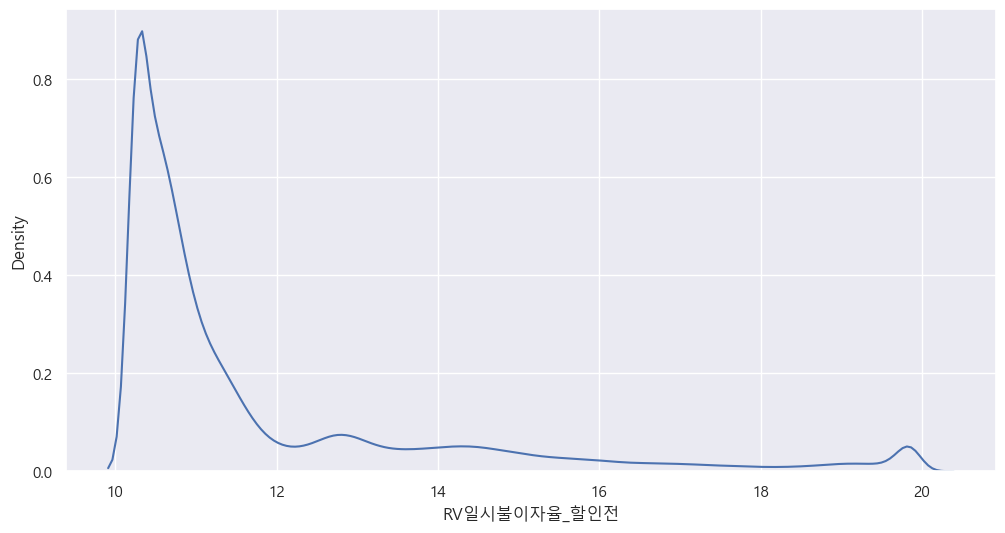

In [132]:
sns.kdeplot(data=combined_df, x='RV일시불이자율_할인전')

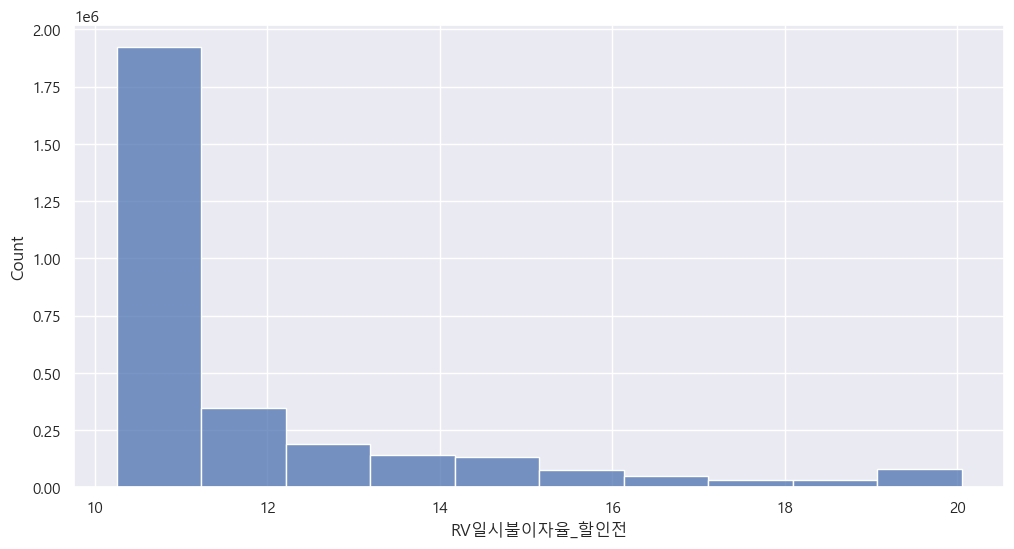

In [133]:

sns.histplot(data=combined_df, x='RV일시불이자율_할인전', bins = 10)
plt.show()

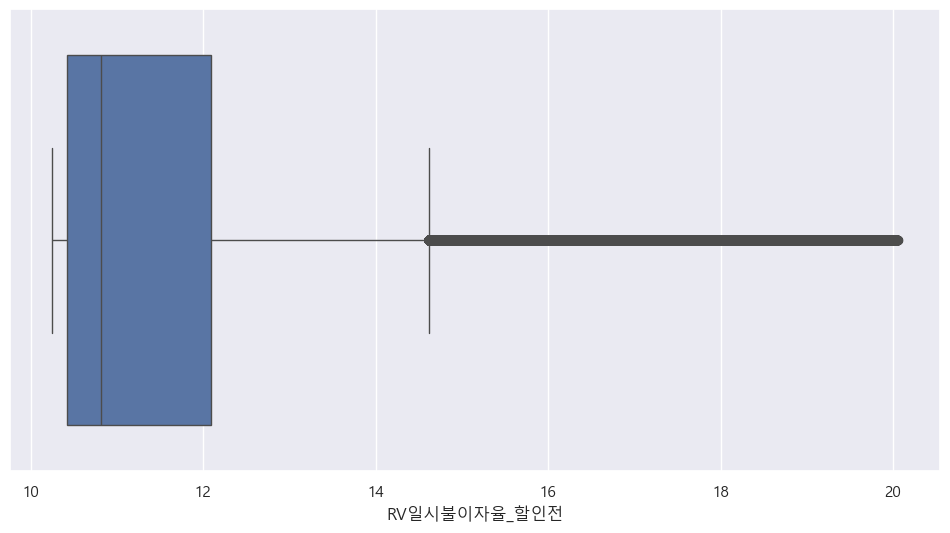

In [134]:
sns.boxplot(x=combined_df['RV일시불이자율_할인전'])
plt.show()

In [210]:
combined_df['RV일시불이자율_할인전'].describe()

count    3.000000e+06
mean     1.178133e+01
std      2.223214e+00
min      1.024998e+01
25%      1.041690e+01
50%      1.080951e+01
75%      1.209654e+01
max      2.005541e+01
Name: RV일시불이자율_할인전, dtype: float64

- 10.249980 값이 가장 많이 존재함
- 10.2% 부근에 가장 높은 봉우리가 존재함
- 이후 점점 완만하게 감소

### RV현금서비스이자율_할인전
- 리볼빙 현금서비스 이자율 (할인 전

In [136]:
combined_df['RV현금서비스이자율_할인전'].value_counts()

RV현금서비스이자율_할인전
22.999954    43882
10.399979    21124
13.635998        5
13.109234        4
13.107466        4
             ...  
16.199222        1
13.137100        1
13.128447        1
13.097391        1
13.269979        1
Name: count, Length: 2852247, dtype: int64

<Axes: xlabel='RV현금서비스이자율_할인전', ylabel='Density'>

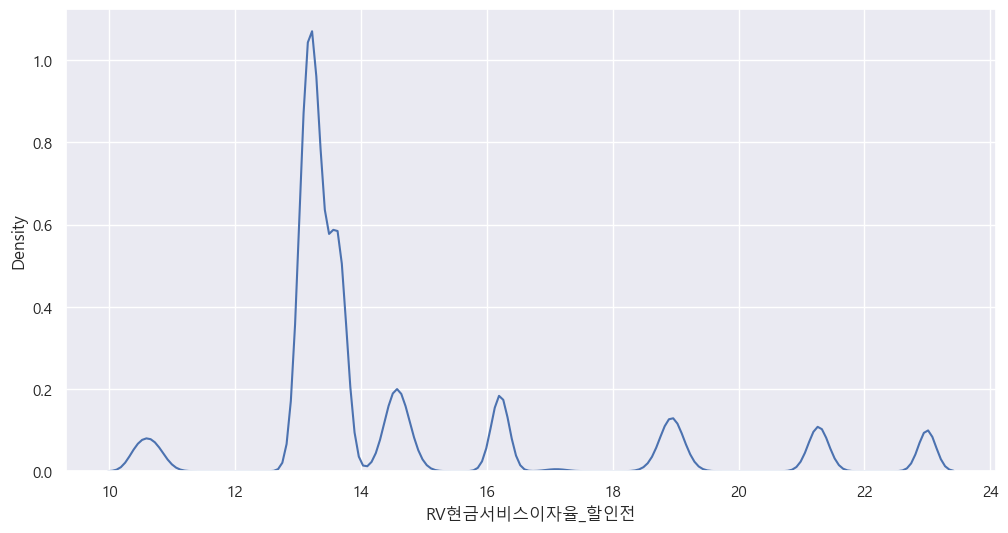

In [137]:
sns.kdeplot(data=combined_df, x='RV현금서비스이자율_할인전')

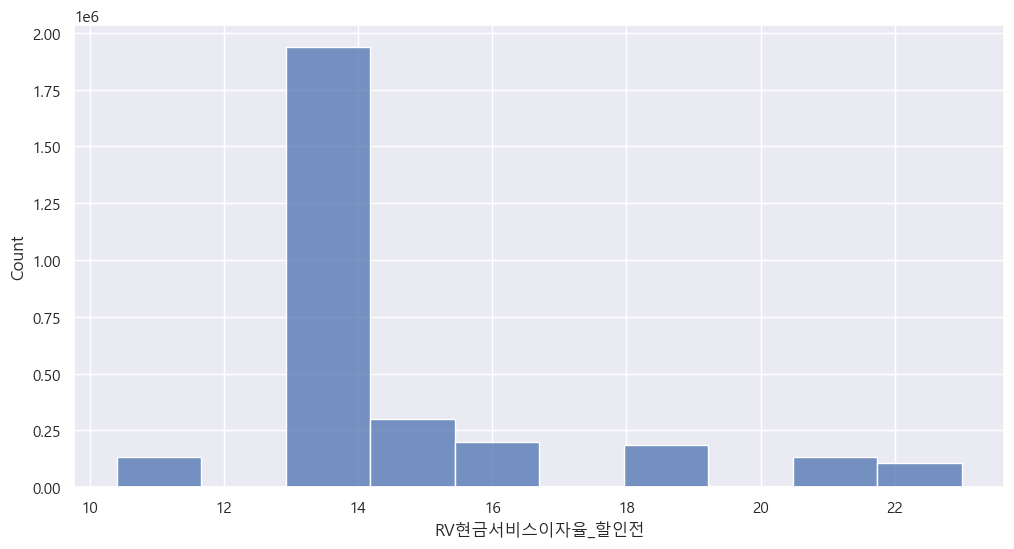

In [138]:

sns.histplot(data=combined_df, x='RV현금서비스이자율_할인전', bins = 10)
plt.show()

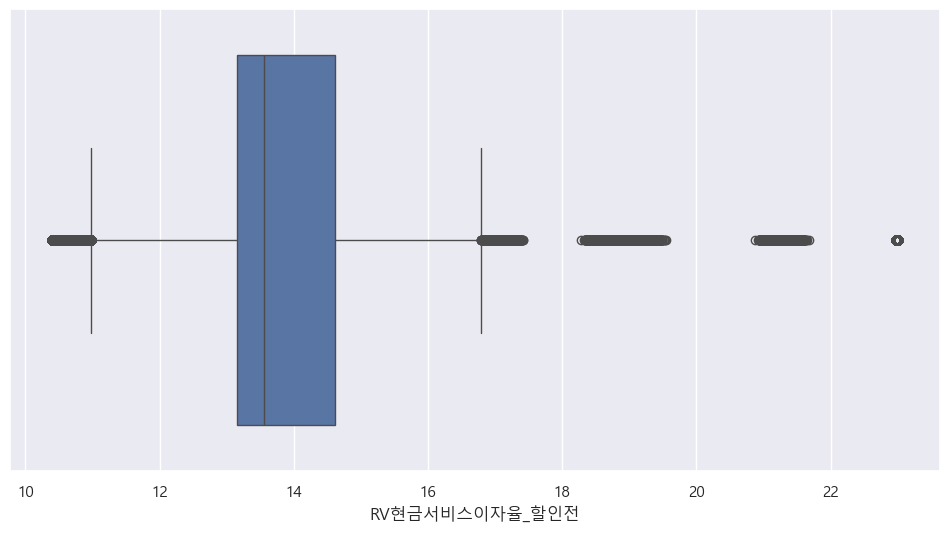

In [139]:
sns.boxplot(x=combined_df['RV현금서비스이자율_할인전'])
plt.show()

In [206]:
combined_df['RV현금서비스이자율_할인전'].describe()

count    3.000000e+06
mean     1.457568e+01
std      2.753034e+00
min      1.039998e+01
25%      1.315758e+01
50%      1.356196e+01
75%      1.461119e+01
max      2.299995e+01
Name: RV현금서비스이자율_할인전, dtype: float64

- 22.99%에 가장 큰 도수
- 13.5% 부근에 압도적인 최고봉
- 13~14% 구간에 약 190만 건 이상 집중됨

### RV약정청구율
- 리볼빙 약정 청구 비율

In [141]:
combined_df['RV약정청구율'].value_counts()

RV약정청구율
0.000000     2431009
99.999800     504421
20.531178          3
19.740703          3
19.491479          2
              ...   
19.092547          1
21.932218          1
21.160603          1
18.763168          1
19.102323          1
Name: count, Length: 64399, dtype: int64

<Axes: xlabel='RV약정청구율', ylabel='Density'>

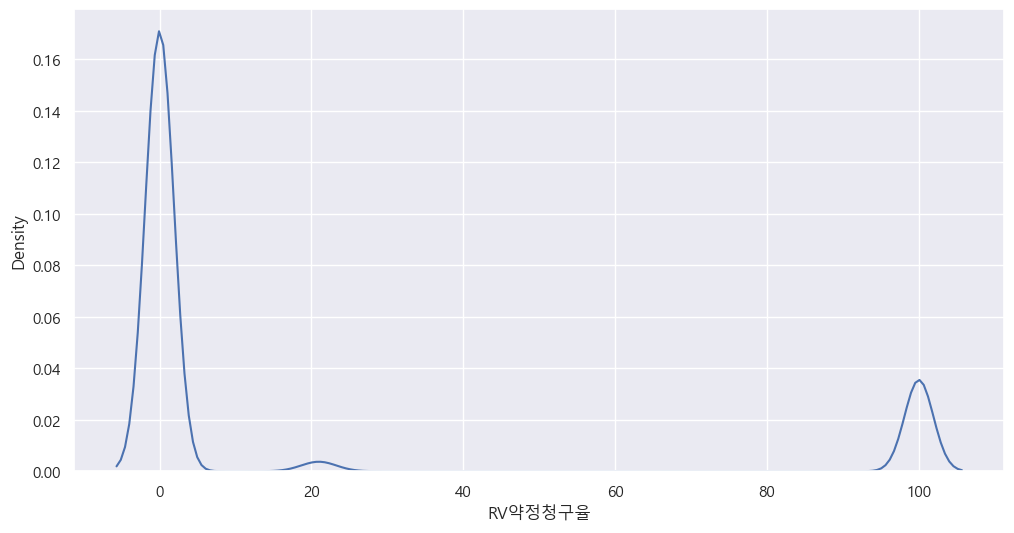

In [142]:
sns.kdeplot(data=combined_df, x='RV약정청구율')

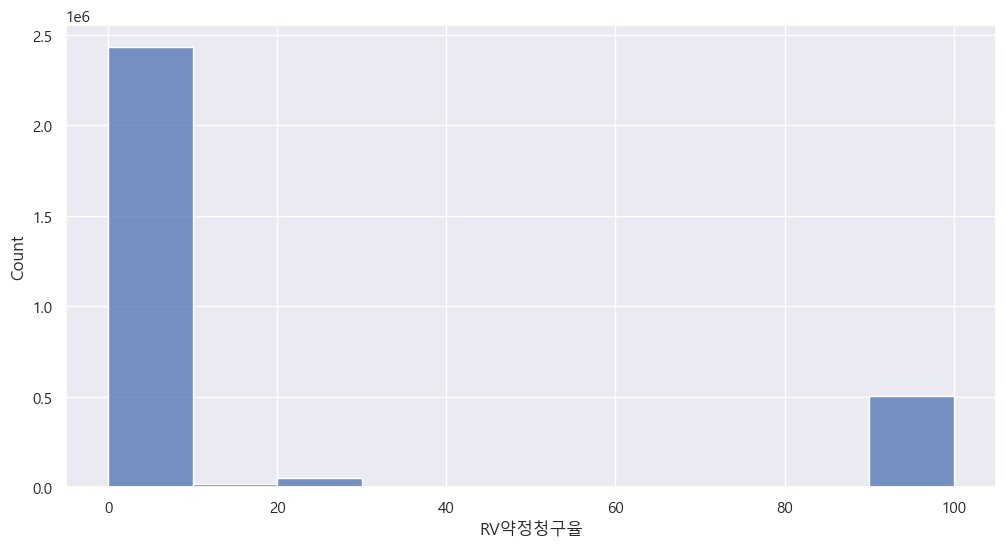

In [143]:

sns.histplot(data=combined_df, x='RV약정청구율', bins = 10)
plt.show()

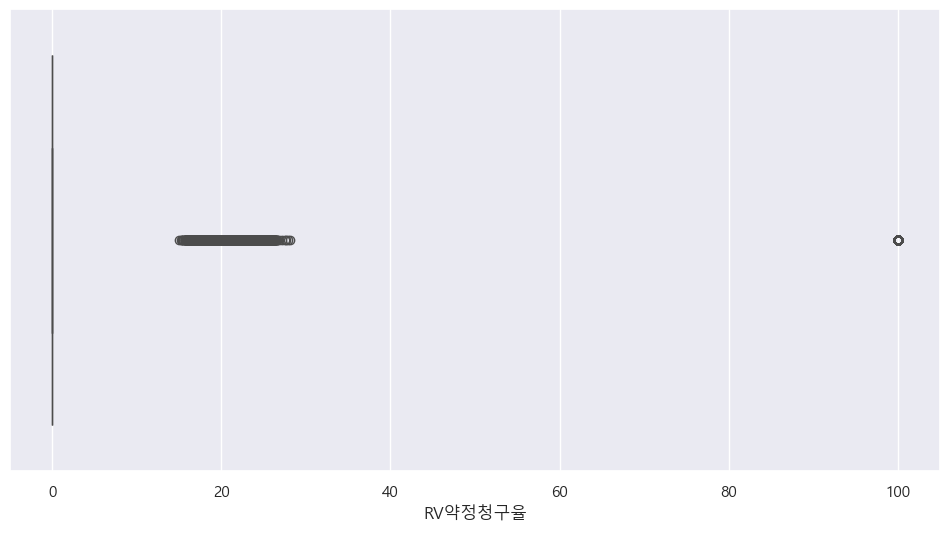

In [144]:
sns.boxplot(x=combined_df['RV약정청구율'])
plt.show()

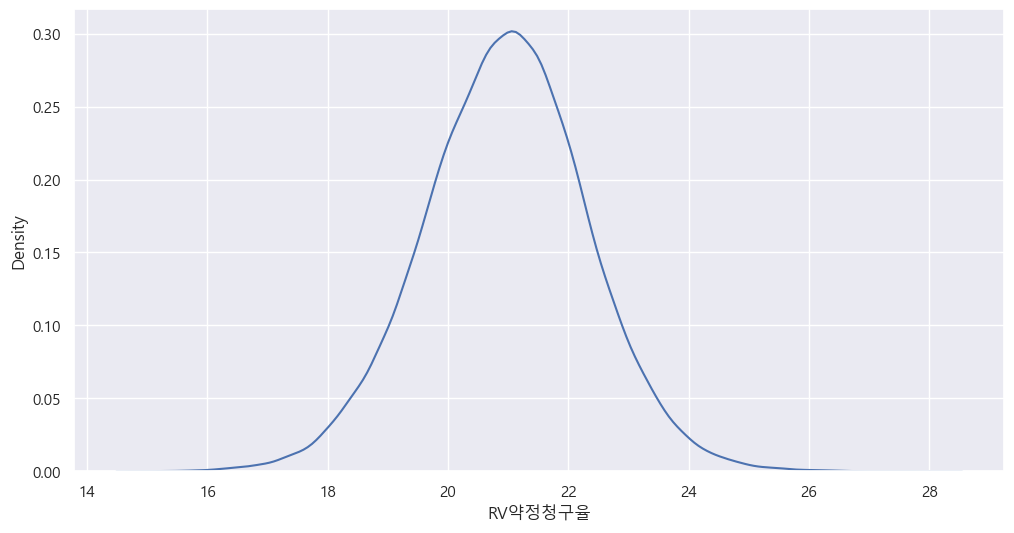

In [491]:
a1 = combined_df.query('RV약정청구율 > 0.0 and RV약정청구율 < 99.999800')
sns.kdeplot(data=a1, x='RV약정청구율')
plt.show()


- 0에 가장 많이 분포하며 99.999800이 두번째인데 확인 필요
- 0과 99.999800을 제외할 경우 kdeplot이 정규분포에 가까운 모습을 보여주며 약 21%에서 가장 높게 나타남 

### RV최소결제비율	
- 리볼빙 최소 결제 비율

In [146]:
combined_df['RV최소결제비율'].value_counts()

RV최소결제비율
9.99998     2154931
19.99996     479319
14.99997     315469
0.00000       37140
24.99995      13098
29.99994         43
Name: count, dtype: int64

<Axes: xlabel='RV최소결제비율', ylabel='Density'>

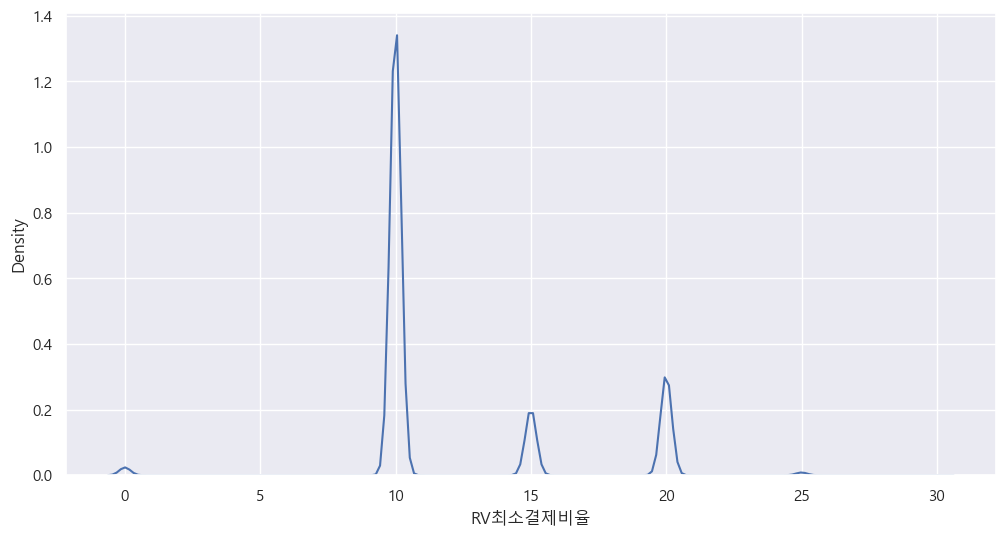

In [147]:
sns.kdeplot(data=combined_df, x='RV최소결제비율')

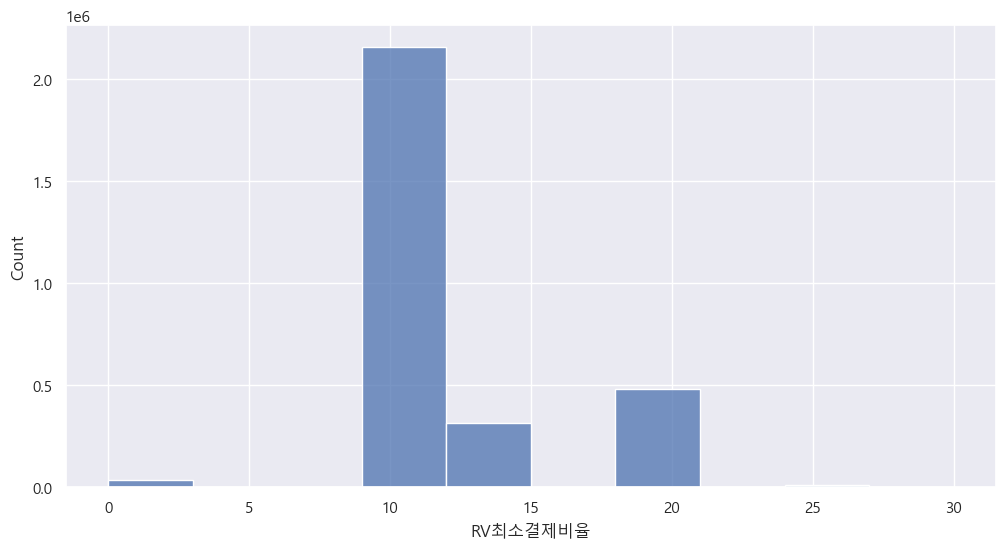

In [148]:

sns.histplot(data=combined_df, x='RV최소결제비율', bins = 10)
plt.show()

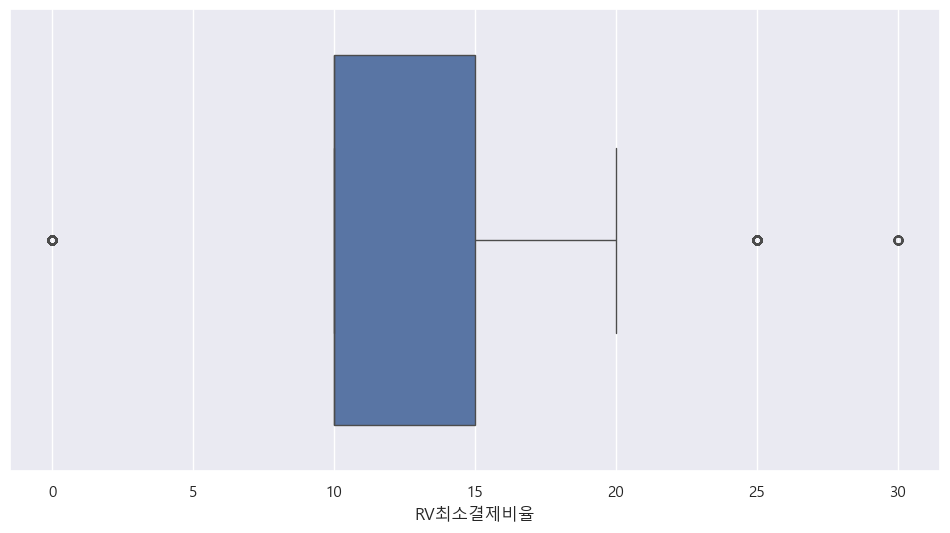

In [150]:
sns.boxplot(x=combined_df['RV최소결제비율'])
plt.show()

- 9.99998%, 19.99996% 순으로 분포 
연속분포처럼 보이는 범주형 데이터 
약 10%에서 가장 높고 20%, 15%순

### 자발한도감액횟수_R12M	-
- 회원 요청으로 한도 하향한 횟수 (최근 12개월)

In [152]:
combined_df['자발한도감액횟수_R12M'].value_counts()

자발한도감액횟수_R12M
0회    2997230
1회       2763
2회          7
Name: count, dtype: int64

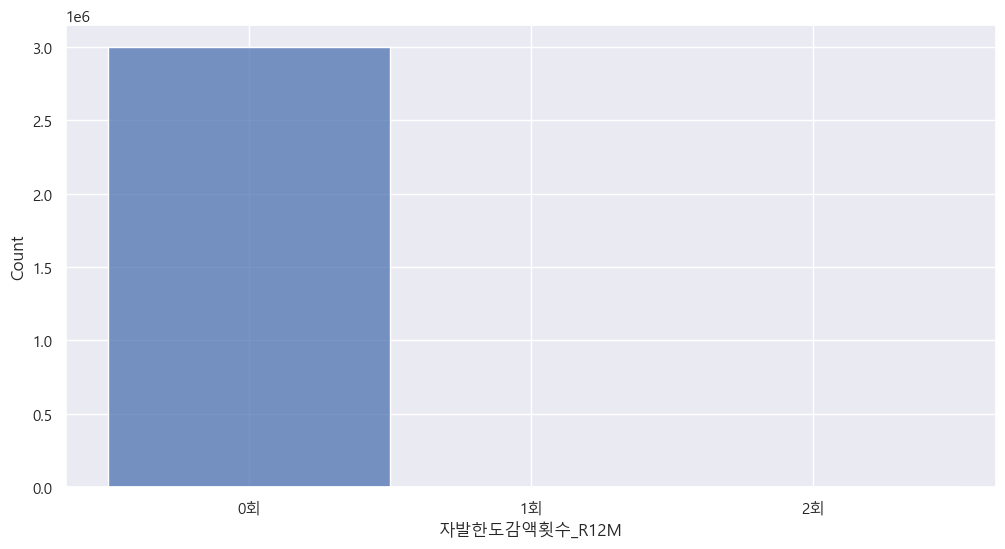

In [220]:

sns.histplot(data=combined_df, x='자발한도감액횟수_R12M', bins = 10)
plt.show()

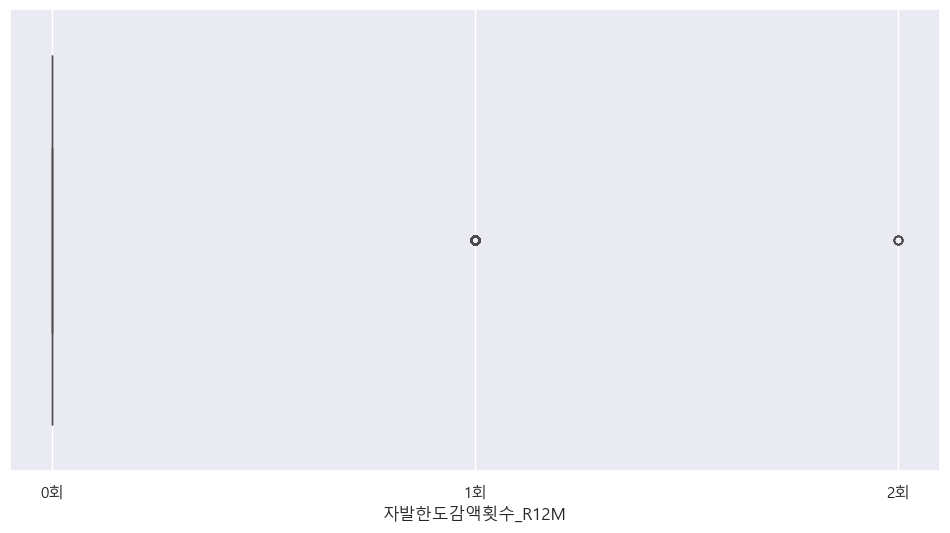

In [221]:
sns.boxplot(x=combined_df['자발한도감액횟수_R12M'])
plt.show()

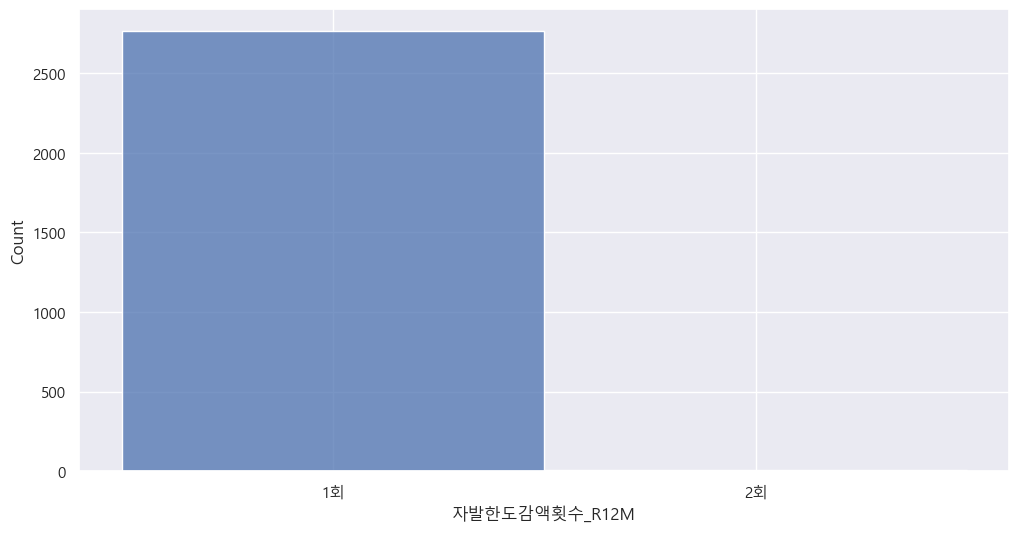

In [499]:

a1 = combined_df.query('자발한도감액횟수_R12M != "0회"')
sns.histplot(data=a1, x='자발한도감액횟수_R12M')
plt.show()

- 범주형 데이터로 한도하향횟수 0회가 가장 많고 아주 많은 차이로 1회이상이 2770건 존재함

### 자발한도감액금액_R12M	
- 회원 요청으로 감액된 한도 총액 (최근 12개월)

In [232]:
combined_df['자발한도감액금액_R12M']

0          0
1          0
2          0
3          0
4          0
          ..
2999995    0
2999996    0
2999997    0
2999998    0
2999999    0
Name: 자발한도감액금액_R12M, Length: 3000000, dtype: int64

In [224]:
combined_df['자발한도감액금액_R12M'].value_counts()

자발한도감액금액_R12M
0    2996865
1       2989
2        146
Name: count, dtype: int64

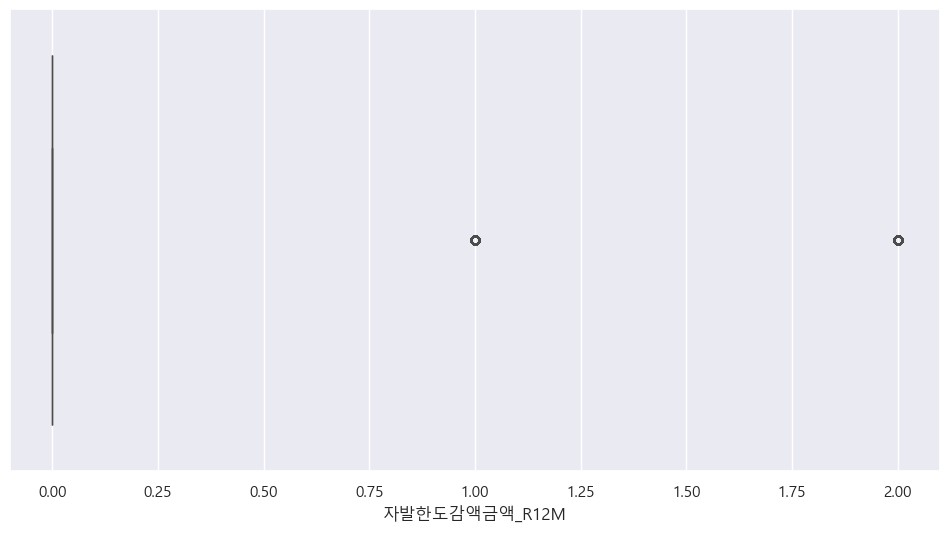

In [228]:
sns.boxplot(x=combined_df['자발한도감액금액_R12M'])
plt.show()

- 감액금액의 컬럼인데 0,1,2의 값으로 이루어짐. 대부분 한도 감액을 하지 않은 것으로 보임

### 자발한도감액후경과월	
- 마지막 자발적 한도 감액 후 경과 개월 수

In [237]:
combined_df['자발한도감액후경과월'].value_counts()

자발한도감액후경과월
12    2999485
0         348
1         108
2          39
3          14
11          3
4           3
Name: count, dtype: int64

<Axes: xlabel='자발한도감액후경과월', ylabel='Density'>

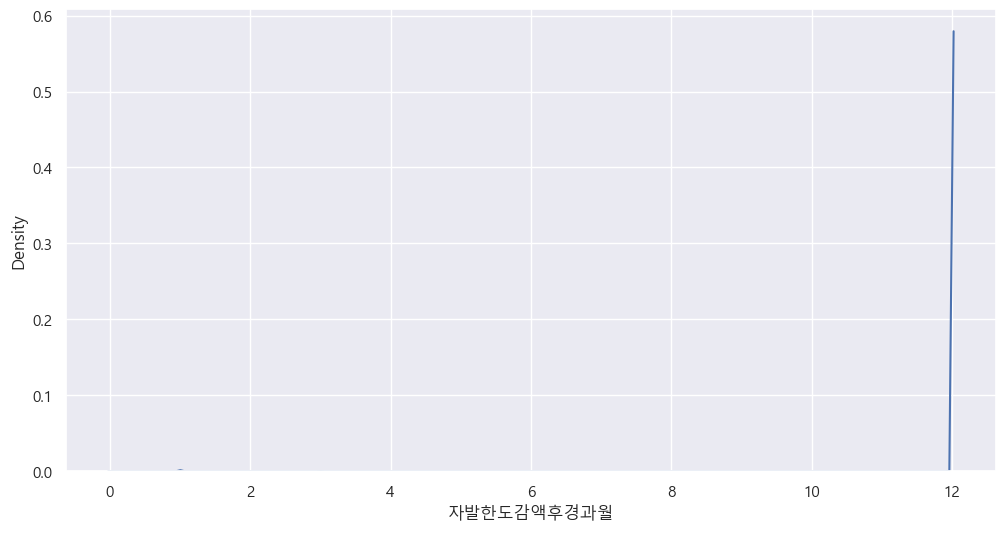

In [239]:
sns.kdeplot(data=combined_df, x='자발한도감액후경과월')

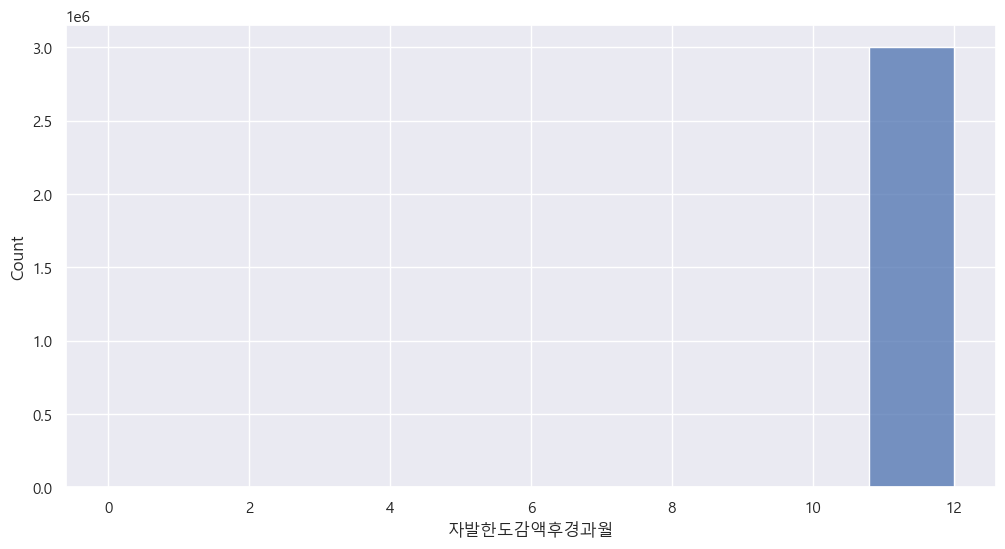

In [240]:

sns.histplot(data=combined_df, x='자발한도감액후경과월', bins = 10)
plt.show()

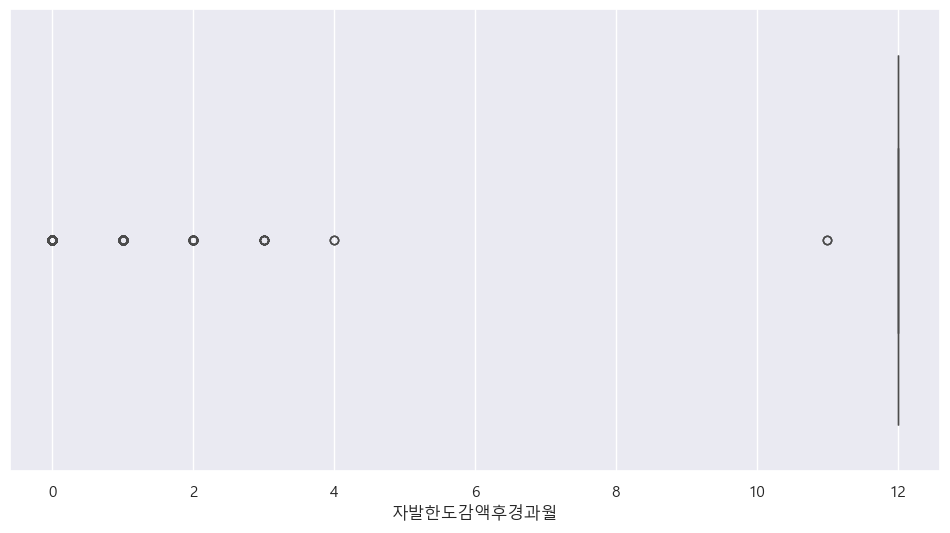

In [241]:
sns.boxplot(x=combined_df['자발한도감액후경과월'])
plt.show()

- 12개월 지난 경우가 가장 많이 존재했음
- 당월의 경우 348건으로 아주 적게 존재 

### 강제한도감액횟수_R12M	
- 비자발적 한도 하향 횟수 (최근 12개월)

In [247]:
combined_df['강제한도감액횟수_R12M'].value_counts()

강제한도감액횟수_R12M
0    2558826
1     420523
4       9204
3       6099
2       5348
Name: count, dtype: int64

<Axes: xlabel='강제한도감액횟수_R12M', ylabel='Density'>

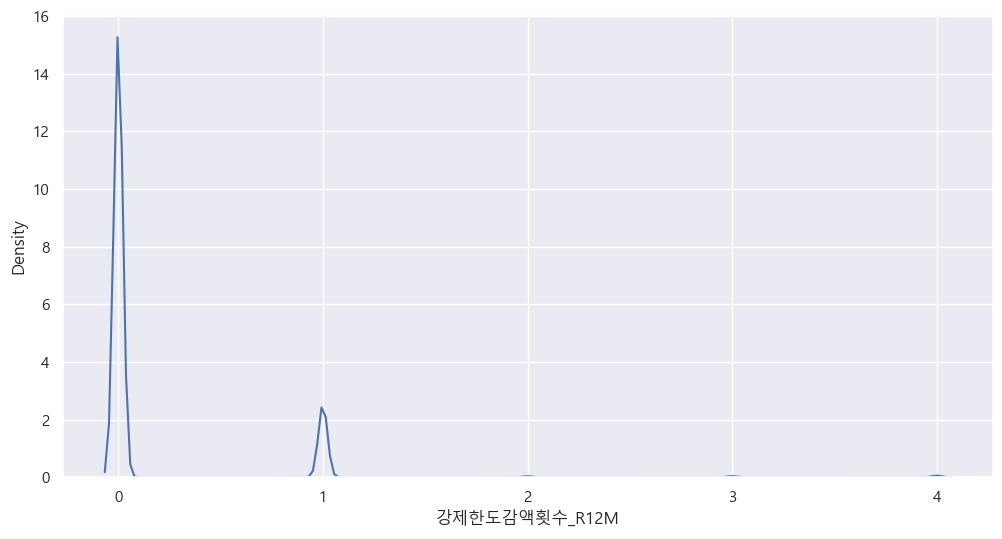

In [249]:
sns.kdeplot(data=combined_df, x='강제한도감액횟수_R12M')

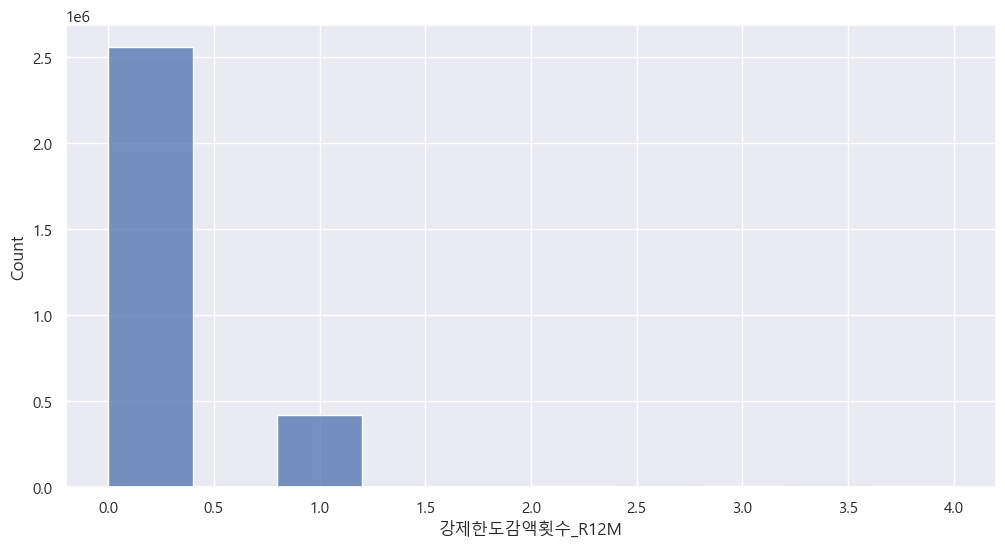

In [250]:

sns.histplot(data=combined_df, x='강제한도감액횟수_R12M', bins = 10)
plt.show()

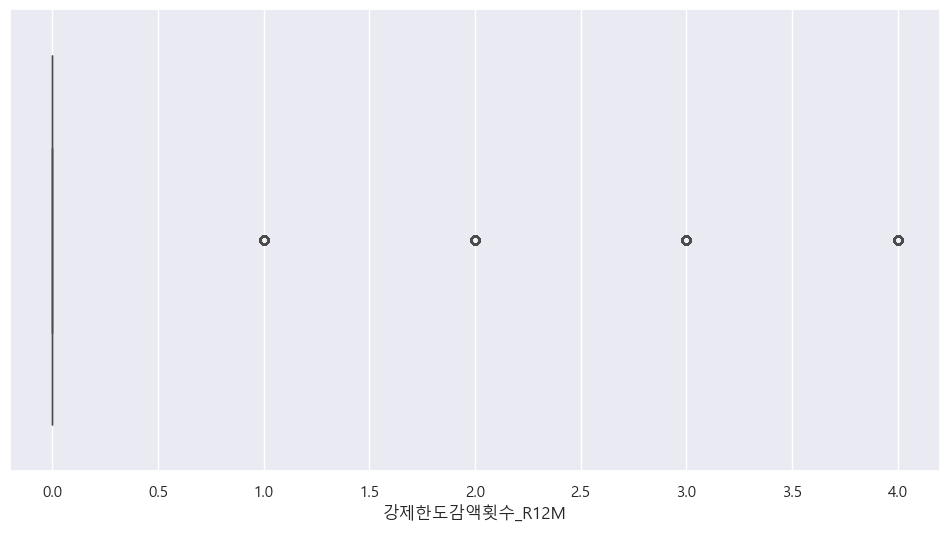

In [251]:
sns.boxplot(x=combined_df['강제한도감액횟수_R12M'])
plt.show()

- 0회가 가장 많았으며
- 1회가 그 다음으로 많았음. 하지만 0회와의 차이가 매우 큼

### 강제한도감액금액_R12M	
- 비자발적으로 감액된 한도 총액 (최근 12개월)

In [253]:
combined_df['강제한도감액금액_R12M'].value_counts()

강제한도감액금액_R12M
0    2601382
1     231246
2     142987
6      23161
4       1030
7        190
9          4
Name: count, dtype: int64

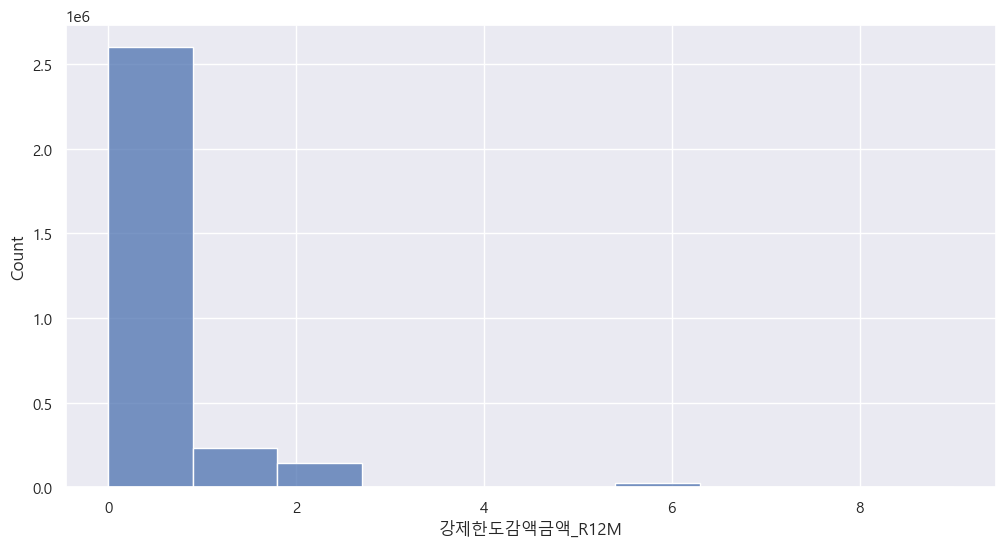

In [256]:

sns.histplot(data=combined_df, x='강제한도감액금액_R12M', bins = 10)
plt.show()

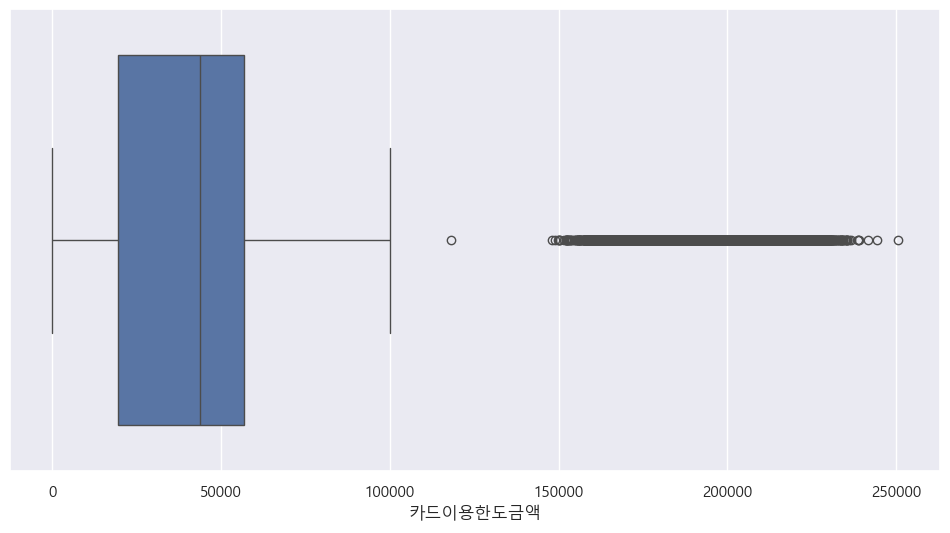

In [257]:
sns.boxplot(x=combined_df['카드이용한도금액'])
plt.show()

- 마찬가지로 0이 가장 많았으며 1 2 6 4 7 9의 순서인데 감액금액인데 이상한 결과치 

### 강제한도감액후경과월	
- 마지막 비자발적 한도 감액 후 경과 개월 수

In [260]:
combined_df['강제한도감액후경과월'].value_counts()

강제한도감액후경과월
12    2664286
9       41167
10      40487
11      39945
1       37600
0       31818
2       31686
3       26672
8       23422
4       22970
5       19933
6       16974
7        3040
Name: count, dtype: int64

<Axes: xlabel='강제한도감액후경과월', ylabel='Density'>

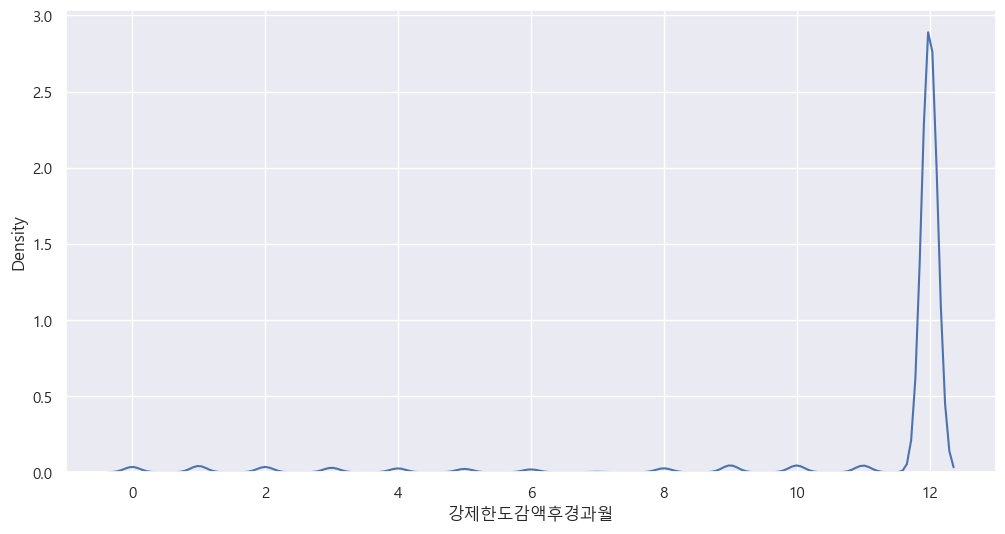

In [261]:
sns.kdeplot(data=combined_df, x='강제한도감액후경과월')

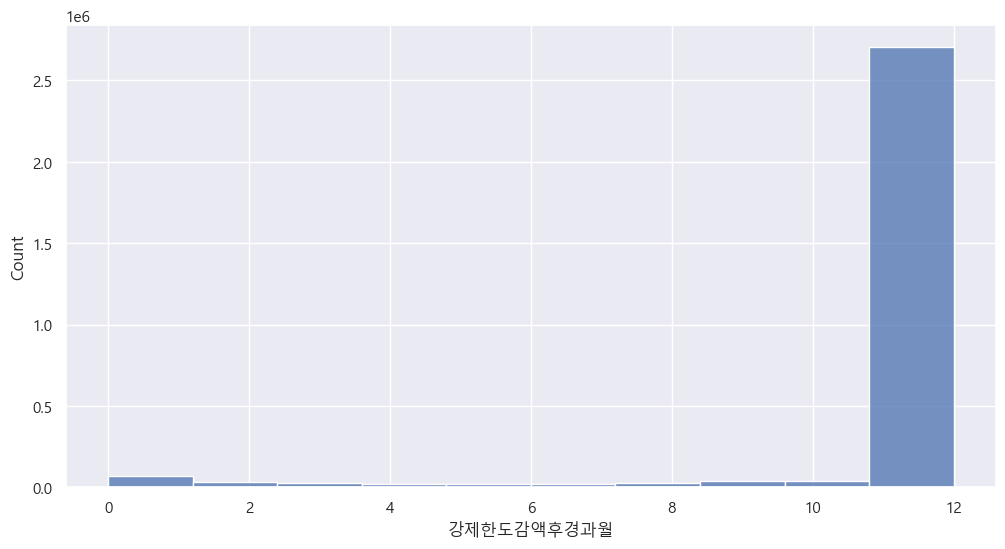

In [262]:

sns.histplot(data=combined_df, x='강제한도감액후경과월', bins = 10)
plt.show()

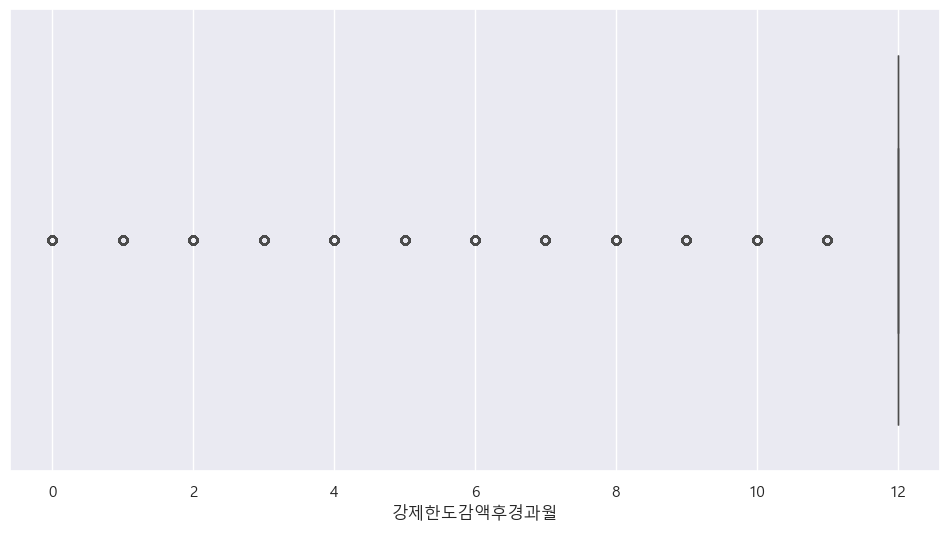

In [263]:
sns.boxplot(x=combined_df['강제한도감액후경과월'])
plt.show()

- 범주형임
- 12개월이 가장 많음 9개월, 10개월, 11개월순 

### 한도증액횟수_R12M	- 
한도 증액 횟수 (최근 12개월)

In [265]:
combined_df['한도증액횟수_R12M'].value_counts()

한도증액횟수_R12M
0회      2644960
1회이상     355040
Name: count, dtype: int64

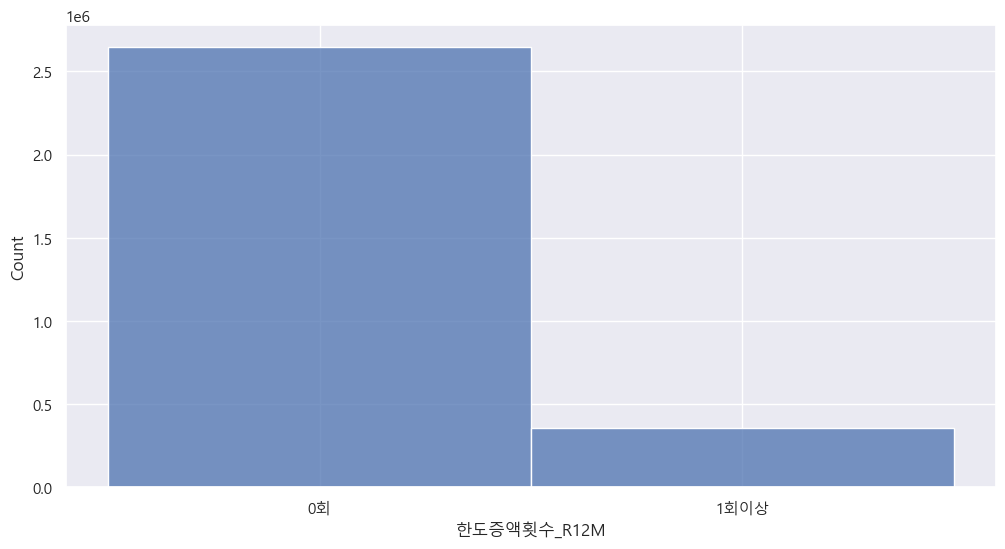

In [268]:

sns.histplot(data=combined_df, x='한도증액횟수_R12M', bins = 10)
plt.show()

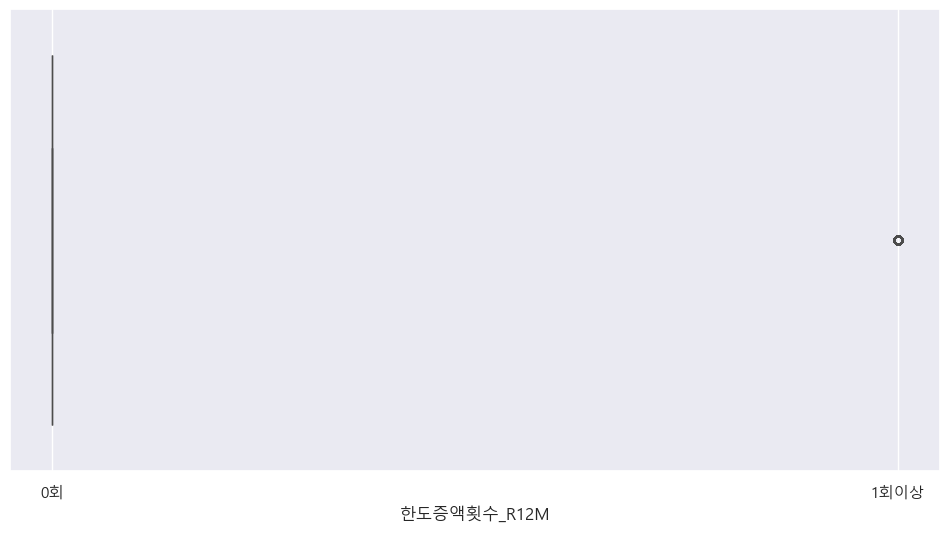

In [269]:
sns.boxplot(x=combined_df['한도증액횟수_R12M'])
plt.show()

- 범주형으로 0회와 1회이상 중 0회가 눈에띄게 많음

### 한도증액금액_R12M	
-증액된 한도 금액 총액 (최근 12개월)

In [271]:
combined_df['한도증액금액_R12M'].value_counts()

한도증액금액_R12M
0    2661176
1     312669
2      26138
3         17
Name: count, dtype: int64

<Axes: xlabel='한도증액금액_R12M', ylabel='Density'>

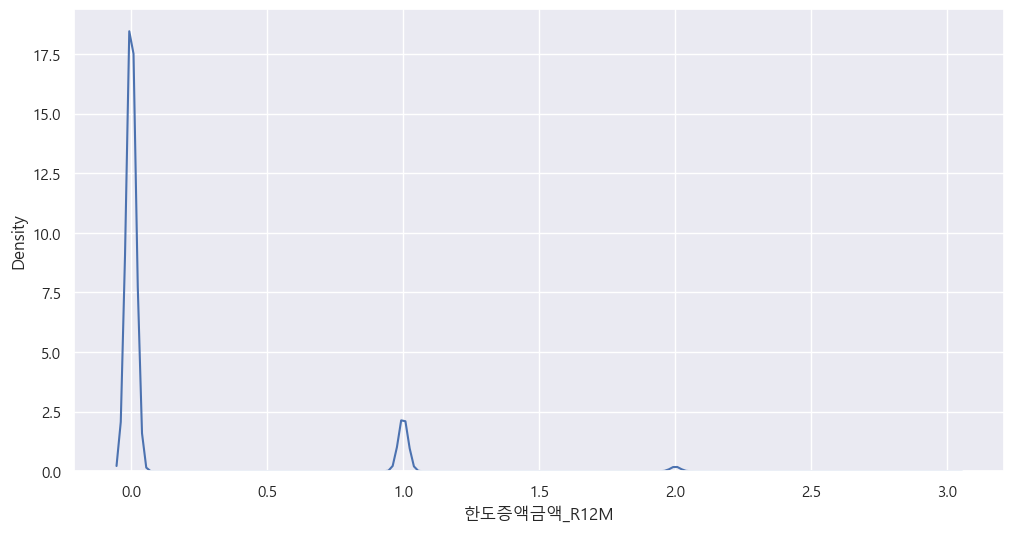

In [272]:
sns.kdeplot(data=combined_df, x='한도증액금액_R12M')

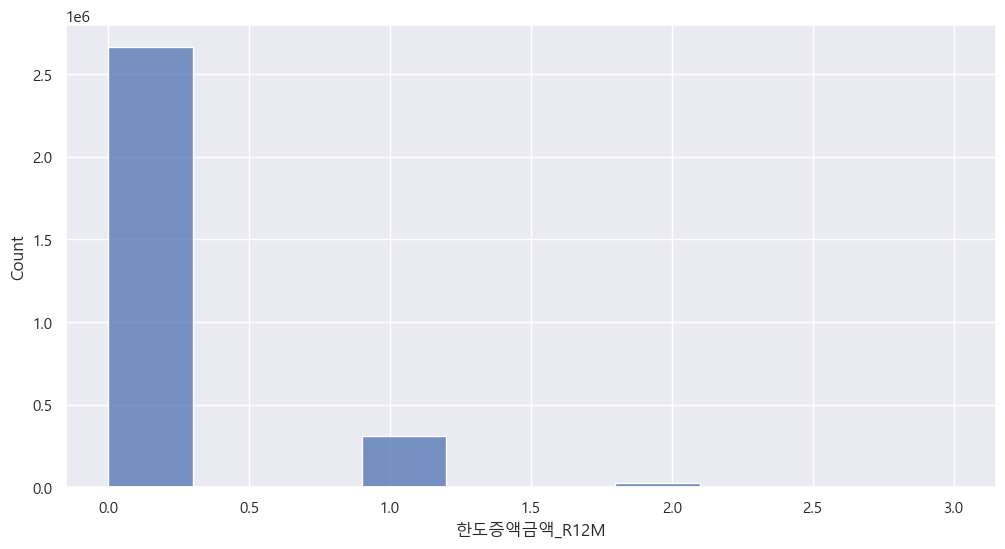

In [273]:

sns.histplot(data=combined_df, x='한도증액금액_R12M', bins = 10)
plt.show()

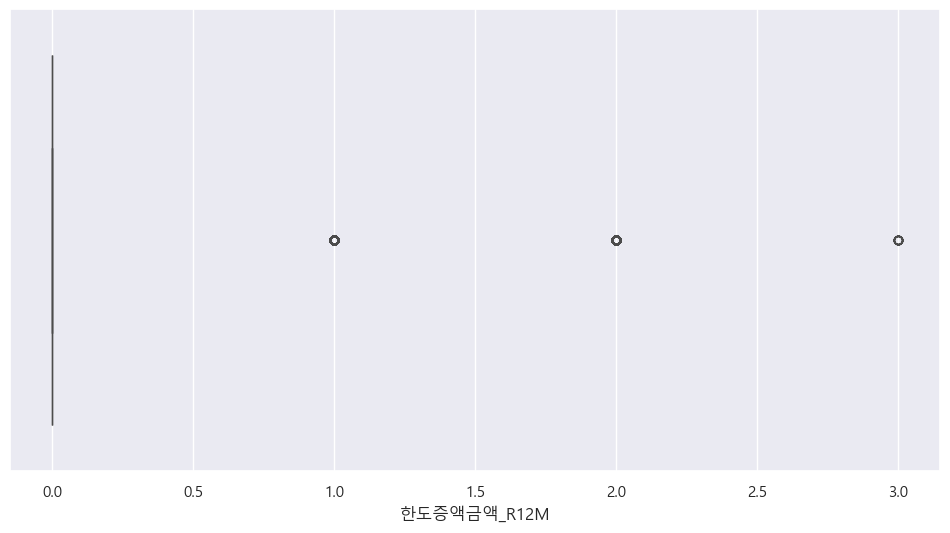

In [274]:
sns.boxplot(x=combined_df['한도증액금액_R12M'])
plt.show()

- 금액총액 데이터지만 0, 1, 2, 3의 형태를 한 데이터 
- 0이 가장 높음

### 한도증액후경과월	
- 마지막 한도 증액 이후 경과 개월 수

In [276]:
combined_df['한도증액후경과월'].value_counts()

한도증액후경과월
12    2722260
6       41955
3       41556
7       41383
5       41276
4       41057
8       40498
11       6499
10       6075
0        5383
2        4491
1        4476
9        3091
Name: count, dtype: int64

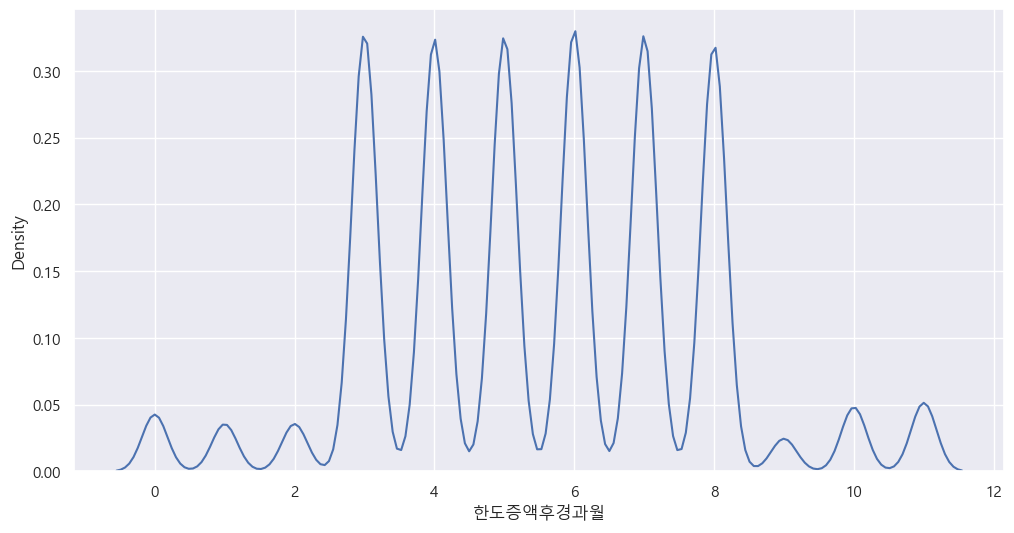

In [503]:
a1 = combined_df.query('한도증액후경과월 < 12')
sns.kdeplot(data=a1, x='한도증액후경과월')
plt.show()

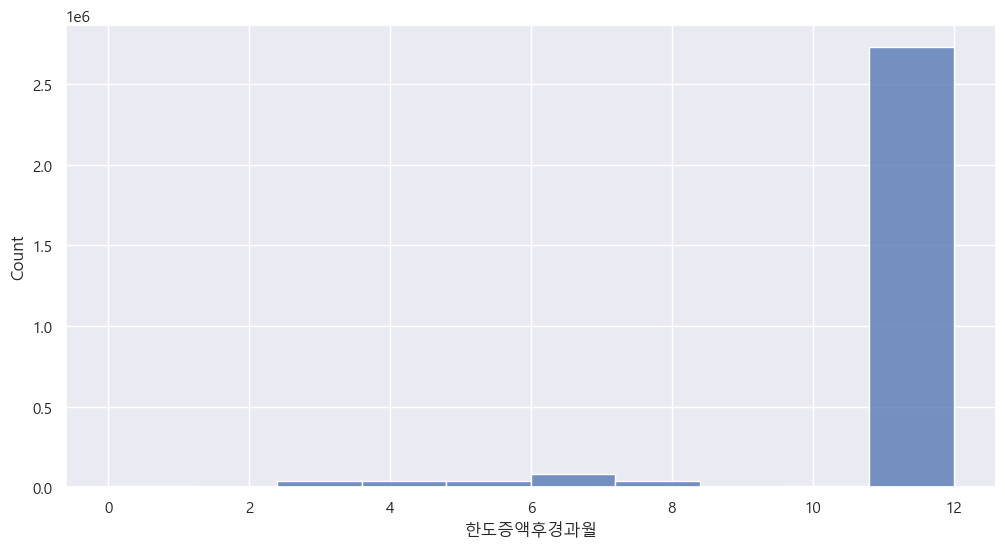

In [278]:

sns.histplot(data=combined_df, x='한도증액후경과월', bins = 10)
plt.show()

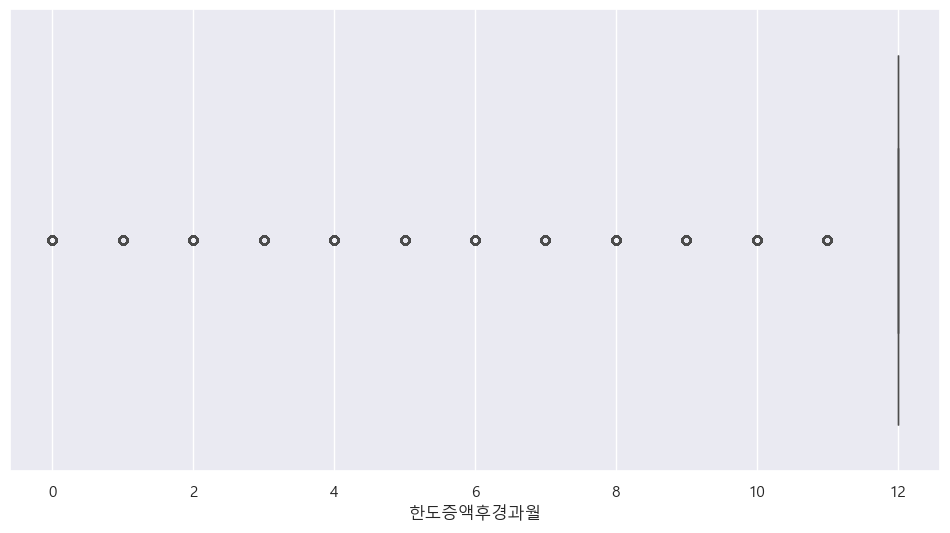

In [279]:
sns.boxplot(x=combined_df['한도증액후경과월'])
plt.show()

- 범주형
- 12개월 경과가 가장 많이 존재 
- 12개월을 제외하면 3~8개월은 약 41000에서 주로 분포, 
- 나머지는 3~6000

### 상향가능한도금액	
- 카드 이용 한도 중 상향 가능한 금액

In [281]:
combined_df['상향가능한도금액'].value_counts()

상향가능한도금액
0     1262022
4      330466
5      278398
6      241473
3      238622
7      206466
8      162475
9      116311
10      74190
11      40697
2       19309
12      18542
13       7316
14       2605
15        780
16        251
17         52
18         23
19          2
Name: count, dtype: int64

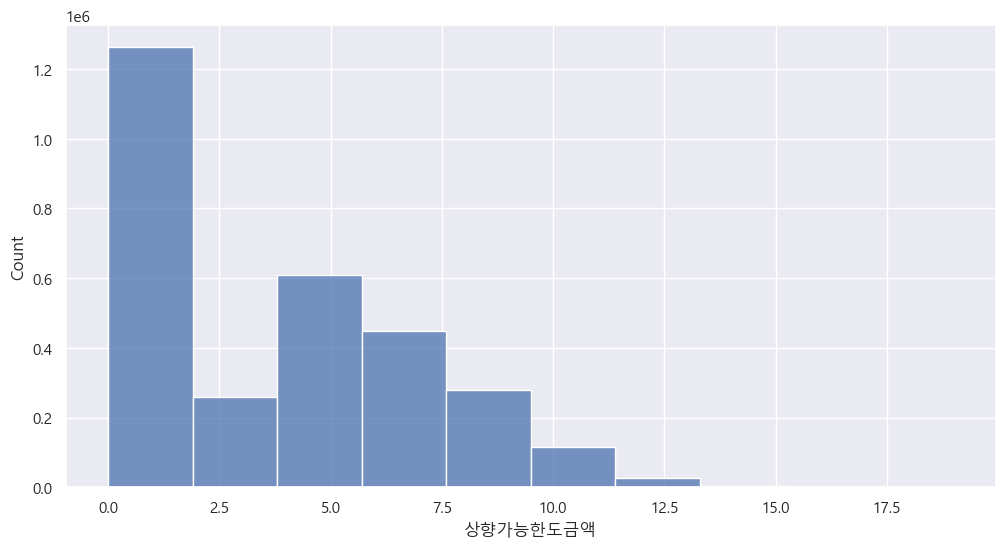

In [283]:

sns.histplot(data=combined_df, x='상향가능한도금액', bins = 10)
plt.show()

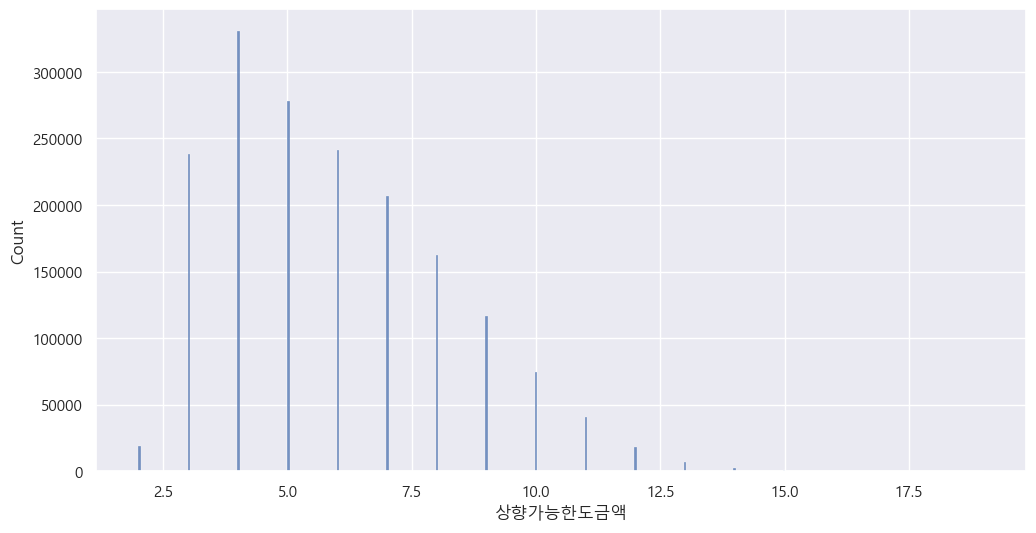

In [505]:
a1 = combined_df.query('상향가능한도금액 > 0.0')
sns.histplot(data=a1, x='상향가능한도금액')
plt.show()


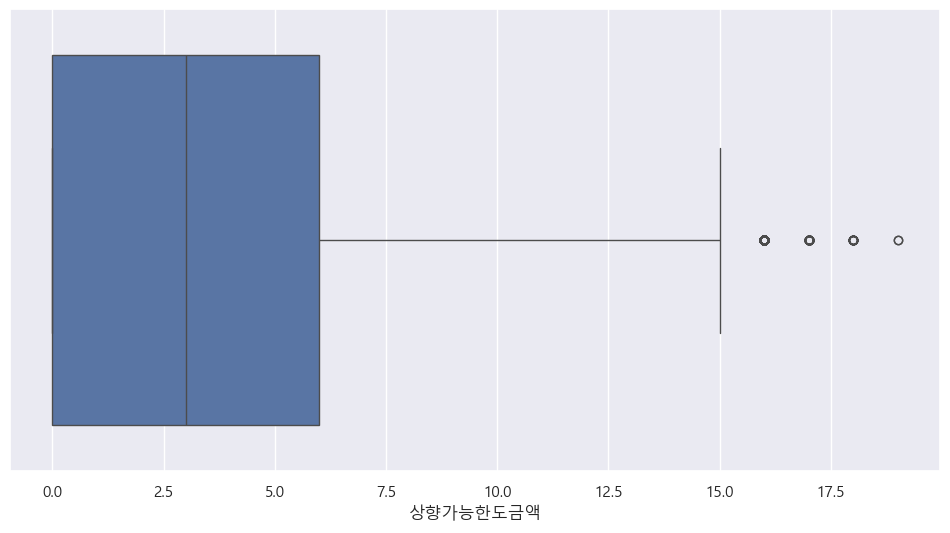

In [284]:
sns.boxplot(x=combined_df['상향가능한도금액'])
plt.show()

- 상향가능 한도금액인데도 금액이 아니라 0~19의 값이 도출

### 상향가능CA한도금액	
- 현금서비스 한도 중 상향 가능한 금액

In [286]:
combined_df['상향가능CA한도금액'].value_counts()

상향가능CA한도금액
0    1310733
1     882770
2     631678
3     173340
4       1479
Name: count, dtype: int64

<Axes: xlabel='상향가능CA한도금액', ylabel='Density'>

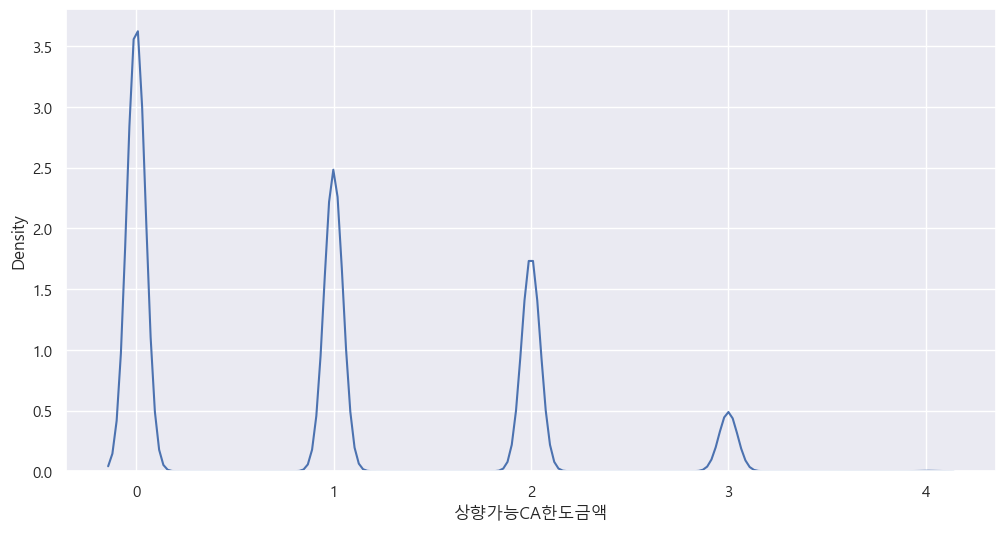

In [287]:
sns.kdeplot(data=combined_df, x='상향가능CA한도금액')

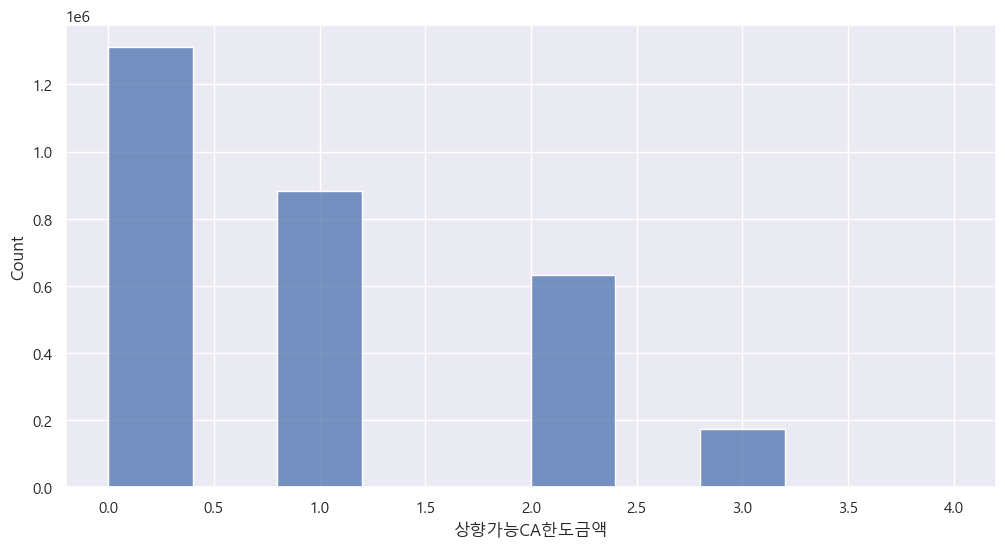

In [288]:

sns.histplot(data=combined_df, x='상향가능CA한도금액', bins = 10)
plt.show()

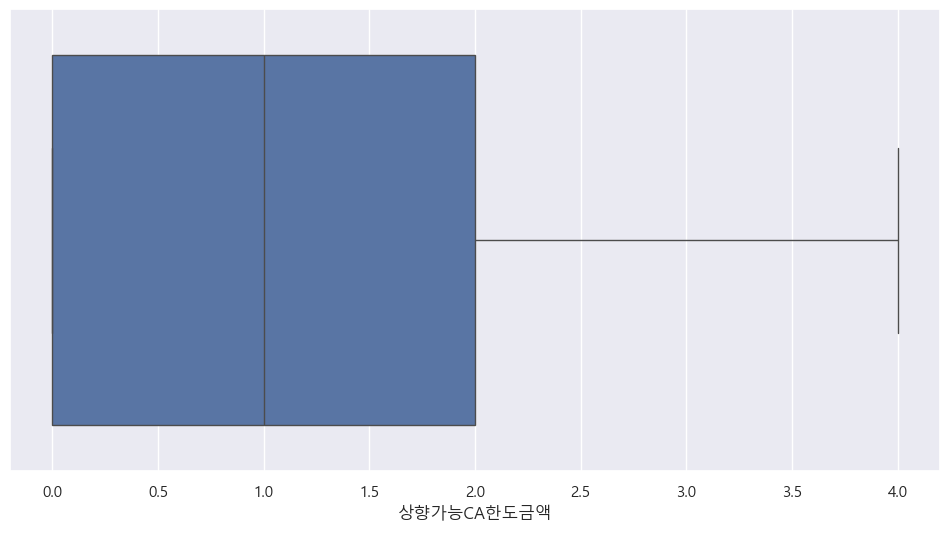

In [289]:
sns.boxplot(x=combined_df['상향가능CA한도금액'])
plt.show()

- 범주형 (0 1 2 3 4)
- 0이 가장 많음

### 카드론동의여부	
- 카드론 상품 이용 동의 여부

In [292]:
combined_df['카드론동의여부'].value_counts()

카드론동의여부
Y    2406657
N     593343
Name: count, dtype: int64

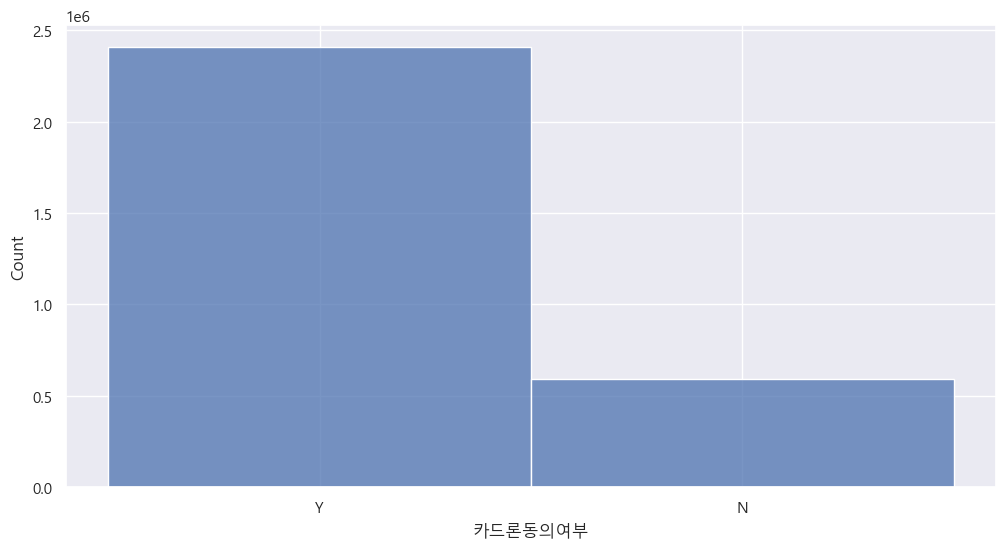

In [321]:

sns.histplot(data=combined_df, x='카드론동의여부', bins = 10)
plt.show()

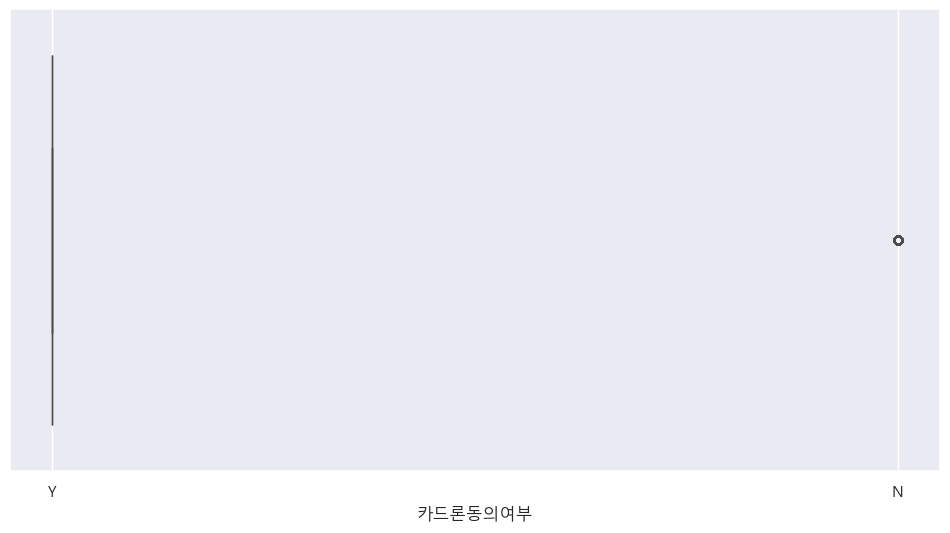

In [322]:
sns.boxplot(x=combined_df['카드론동의여부'])
plt.show()

- Y/N으로 나누어졌고 Y는 2406657개, N은 593343개

### 월상환론상향가능한도금액	
- 카드론 상향 가능 한도 금액

In [324]:
combined_df['월상환론상향가능한도금액'].value_counts()

월상환론상향가능한도금액
0     2535688
18     396375
16      50025
4       12435
15       4393
19        504
12        345
24        190
13         22
17         11
5           5
2           4
23          2
10          1
Name: count, dtype: int64

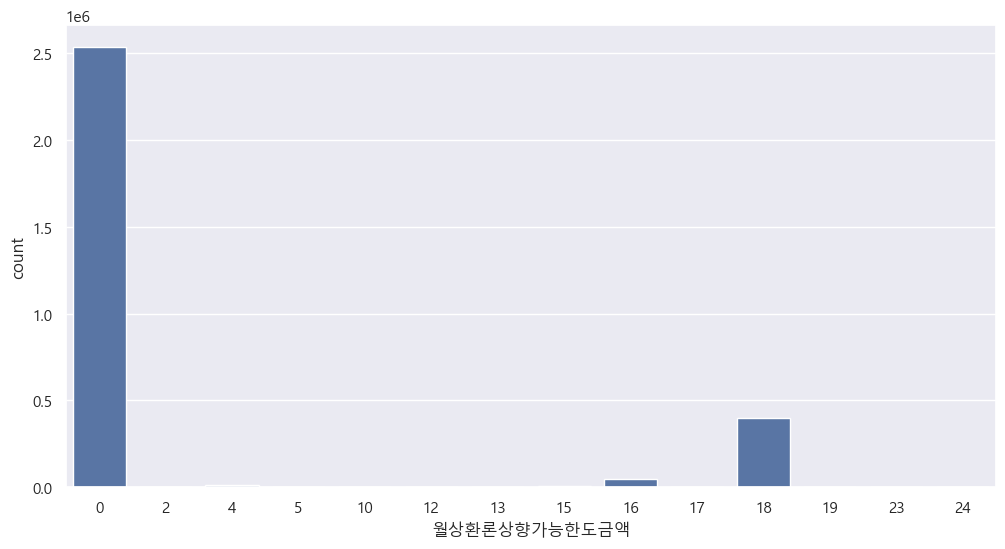

In [377]:

sns.countplot(data=combined_df, x='월상환론상향가능한도금액')
plt.show()

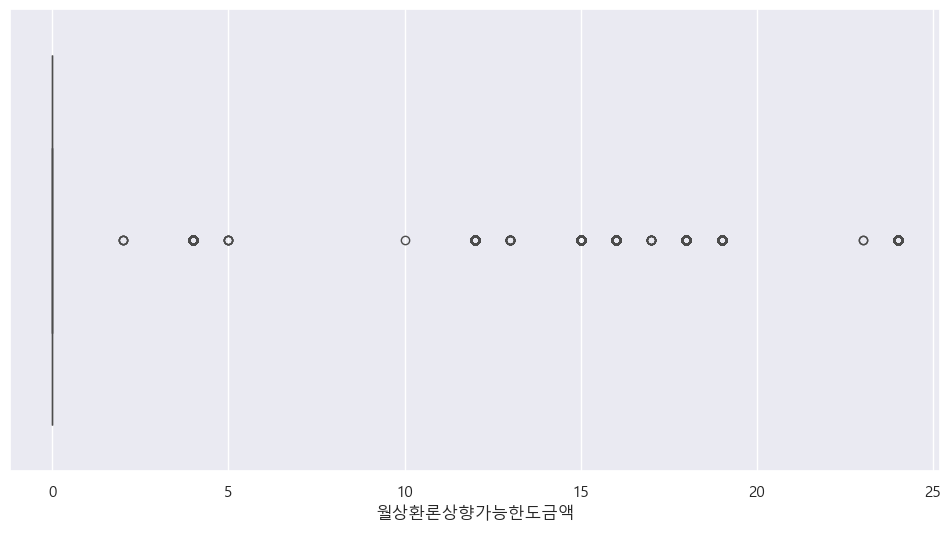

In [327]:
sns.boxplot(x=combined_df['월상환론상향가능한도금액'])
plt.show()

- 상향금액 0이 가장 높고 18, 16, 4 순, 범주형처럼 보임

### 일시불ONLY전환가능여부	
일시불 거래에만 리볼빙 전환 가능 여부

In [329]:
combined_df['일시불ONLY전환가능여부'].value_counts()

일시불ONLY전환가능여부
1    2447879
0     552121
Name: count, dtype: int64

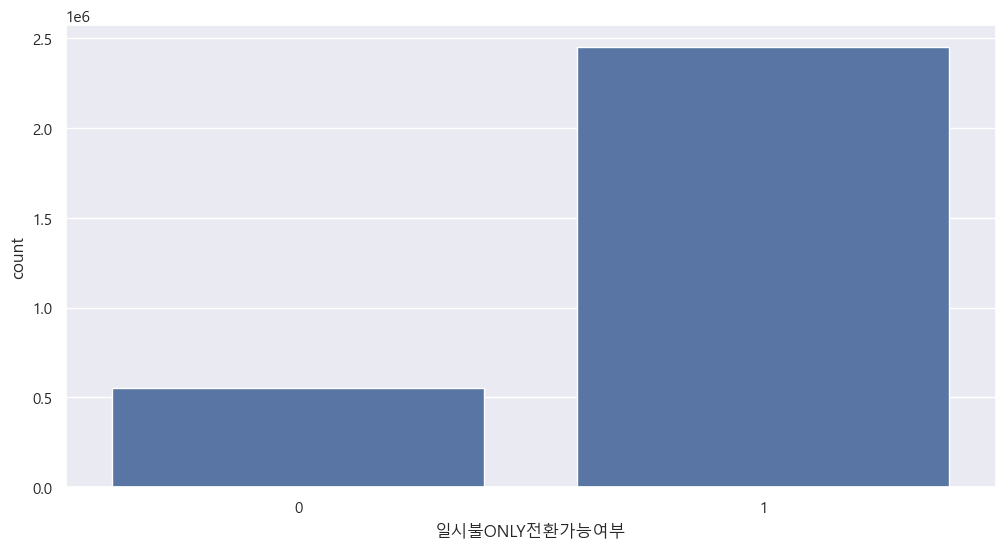

In [374]:

sns.countplot(data=combined_df, x='일시불ONLY전환가능여부')
plt.show()

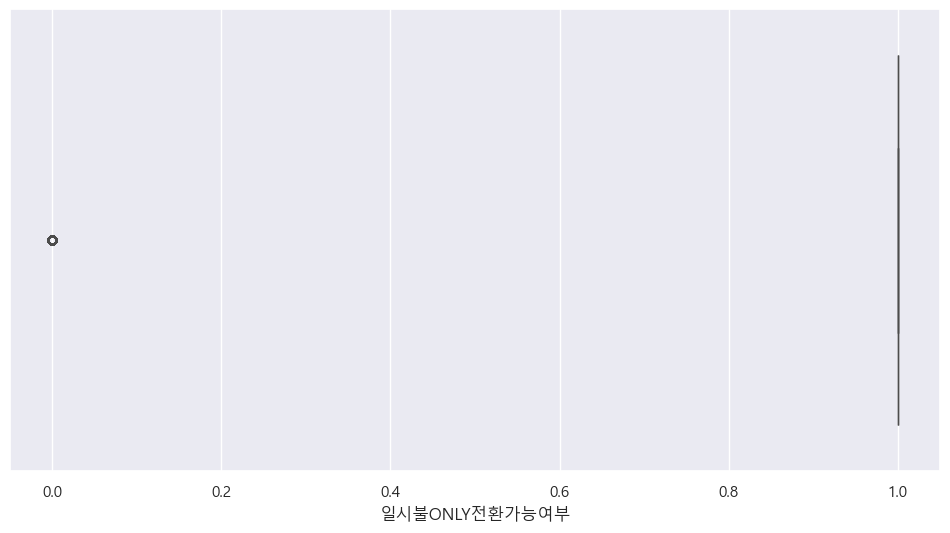

In [332]:
sns.boxplot(x=combined_df['일시불ONLY전환가능여부'])
plt.show()

- 1과 0의 범주형
- 1이 많음 
- 1이 Y인지 0이 Y인지 명세서에서는 판단불가

### 카드이용한도금액_B1M	
- 카드 이용 한도금액 (1개월 전)

In [343]:
combined_df['카드이용한도금액_B1M'].value_counts()

카드이용한도금액_B1M
0         120200
10000      63544
10001      57129
9999       53785
10002      41187
           ...  
214712         1
170112         1
164440         1
169412         1
57887          1
Name: count, Length: 94924, dtype: int64

<Axes: xlabel='카드이용한도금액_B1M', ylabel='Density'>

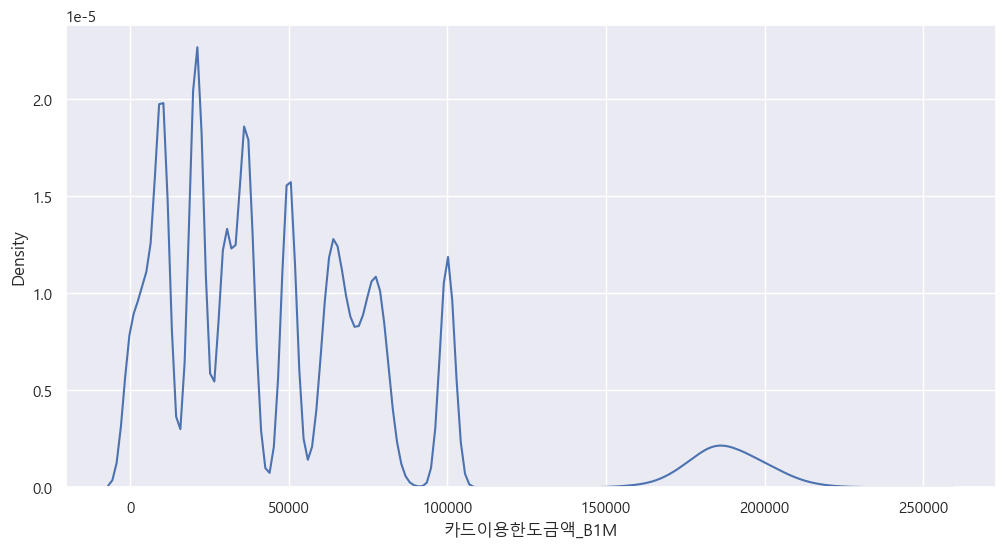

In [344]:
sns.kdeplot(data=combined_df, x='카드이용한도금액_B1M')

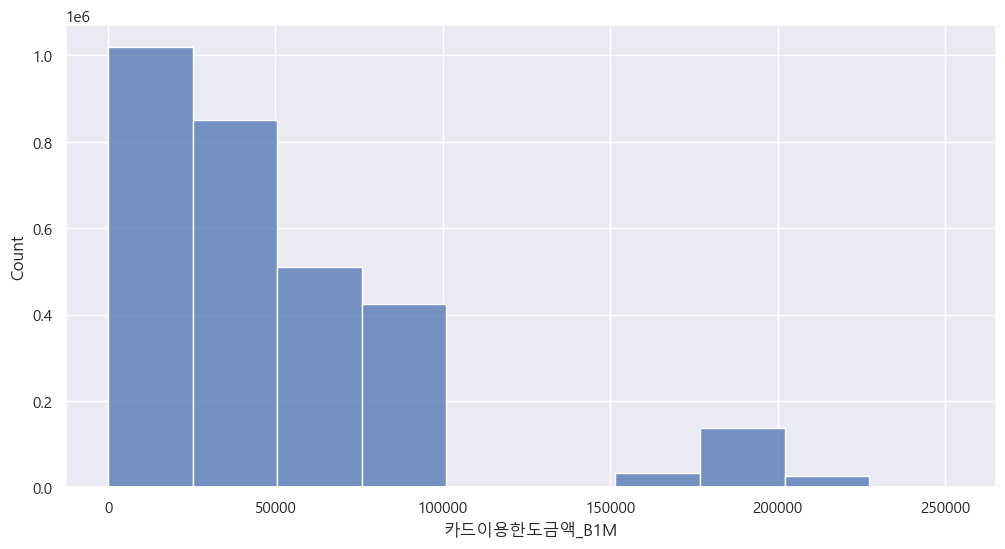

In [346]:

sns.histplot(data=combined_df, x='카드이용한도금액_B1M', bins = 10)
plt.show()

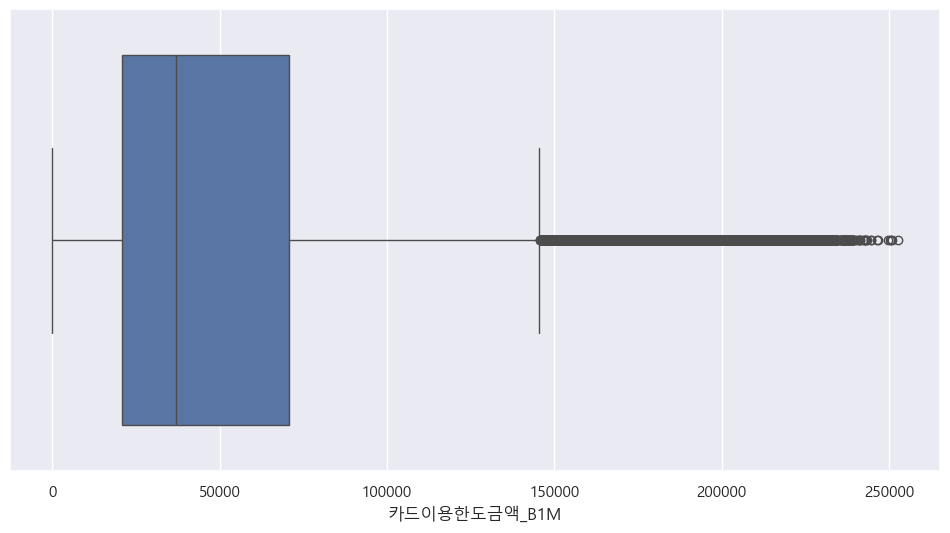

In [347]:
sns.boxplot(x=combined_df['카드이용한도금액_B1M'])
plt.show()

- 0이 가장 많고 10000이 그 다음
- 0~65000정도까지 주로 분포되어있음
 

### 카드이용한도금액_B2M	
- 카드 이용 한도금액 (2개월 전)

In [349]:
combined_df['카드이용한도금액_B2M'].value_counts()

카드이용한도금액_B2M
0         114524
10000      61684
10001      55638
9999       52908
10002      40039
           ...  
210041         1
214851         1
84611          1
156403         1
203335         1
Name: count, Length: 99292, dtype: int64

<Axes: xlabel='카드이용한도금액_B2M', ylabel='Density'>

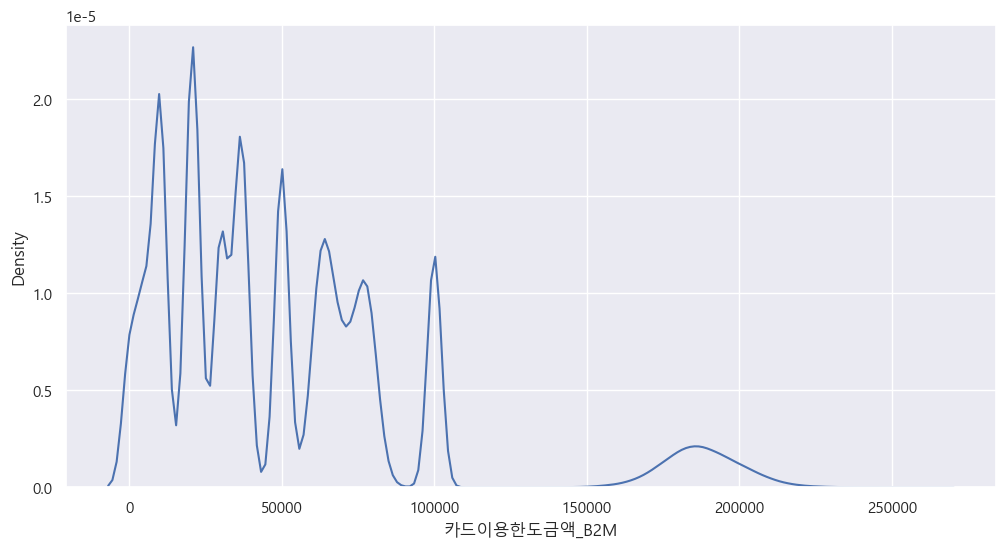

In [350]:
sns.kdeplot(data=combined_df, x='카드이용한도금액_B2M')

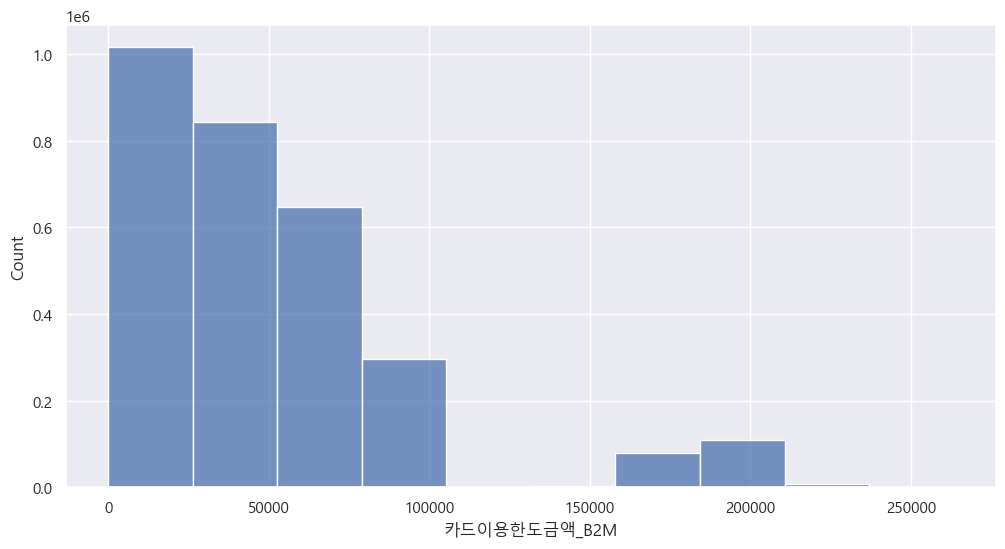

In [351]:

sns.histplot(data=combined_df, x='카드이용한도금액_B2M', bins = 10)
plt.show()

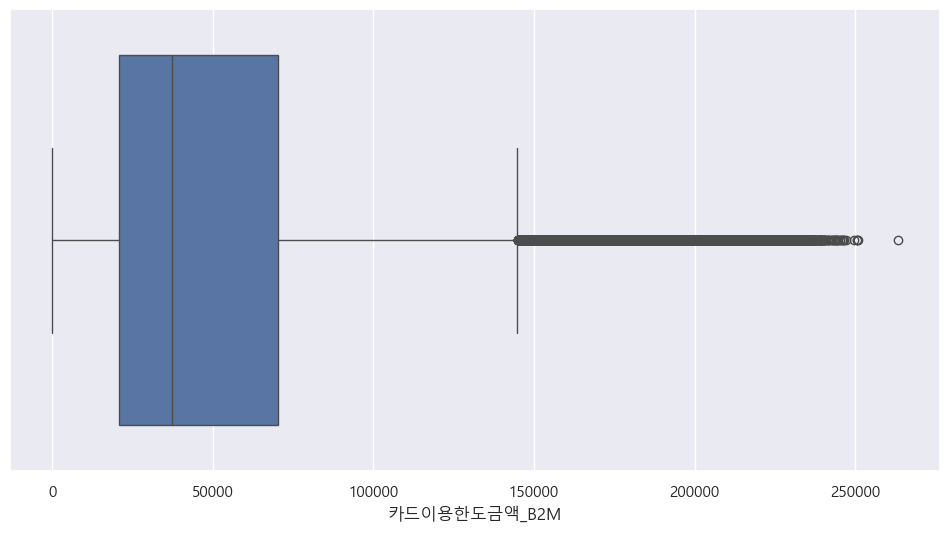

In [352]:
sns.boxplot(x=combined_df['카드이용한도금액_B2M'])
plt.show()

- B1M과 비슷한 분포를 보여줌

### 특별한도보유여부_R3M	
- 최근 3개월간 특별 한도 보유 여부

In [354]:
combined_df['특별한도보유여부_R3M'].value_counts()

특별한도보유여부_R3M
0    2999839
1        161
Name: count, dtype: int64

<Axes: xlabel='특별한도보유여부_R3M', ylabel='Density'>

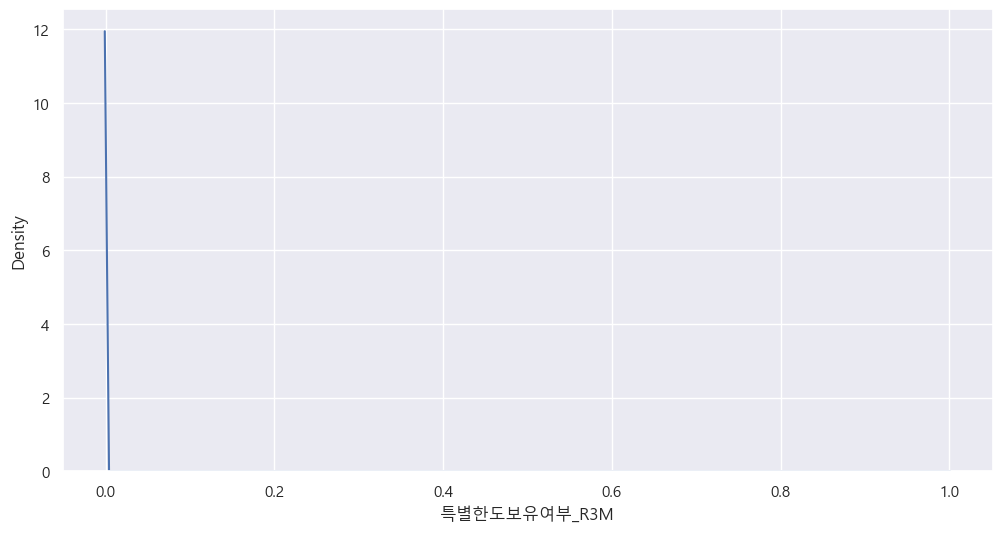

In [355]:
sns.kdeplot(data=combined_df, x='특별한도보유여부_R3M')

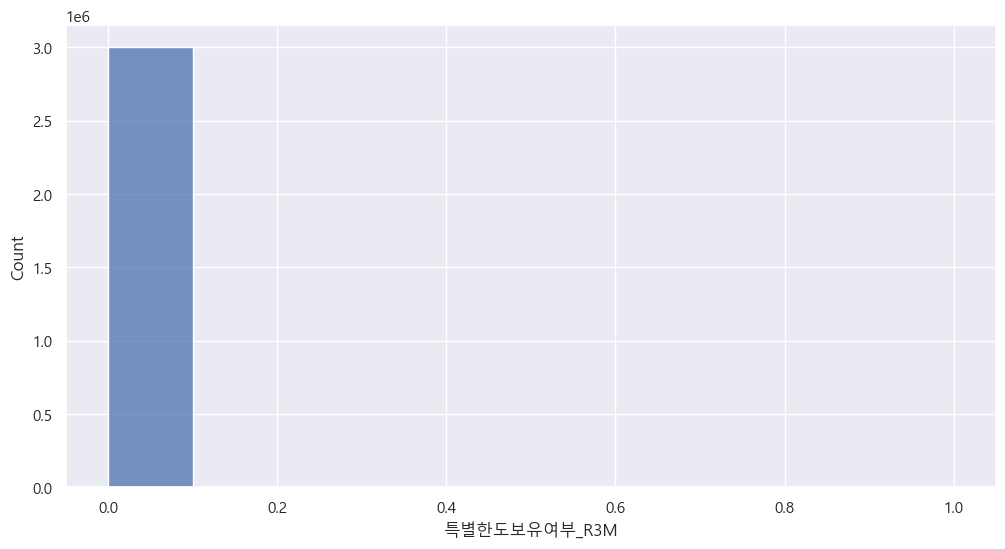

In [356]:

sns.histplot(data=combined_df, x='특별한도보유여부_R3M', bins = 10)
plt.show()

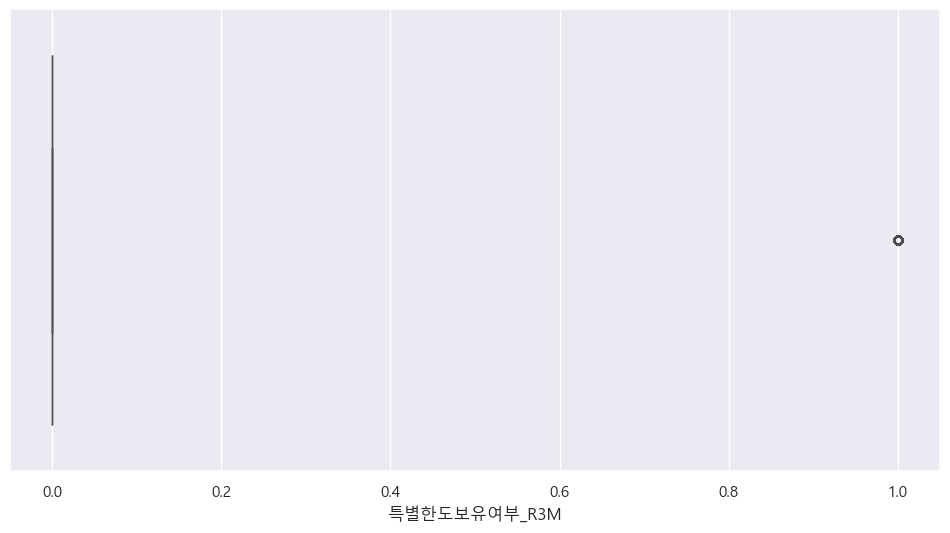

In [357]:
sns.boxplot(x=combined_df['특별한도보유여부_R3M'])
plt.show()

- 범주형, 0이 2999839개 1은 161개로 아주 적은 수 


### 연체감액여부_R3M	
- 최근 3개월간 연체로 인한 한도 감액 여부

In [359]:
combined_df['연체감액여부_R3M'].value_counts()

연체감액여부_R3M
0    2979291
1      20709
Name: count, dtype: int64

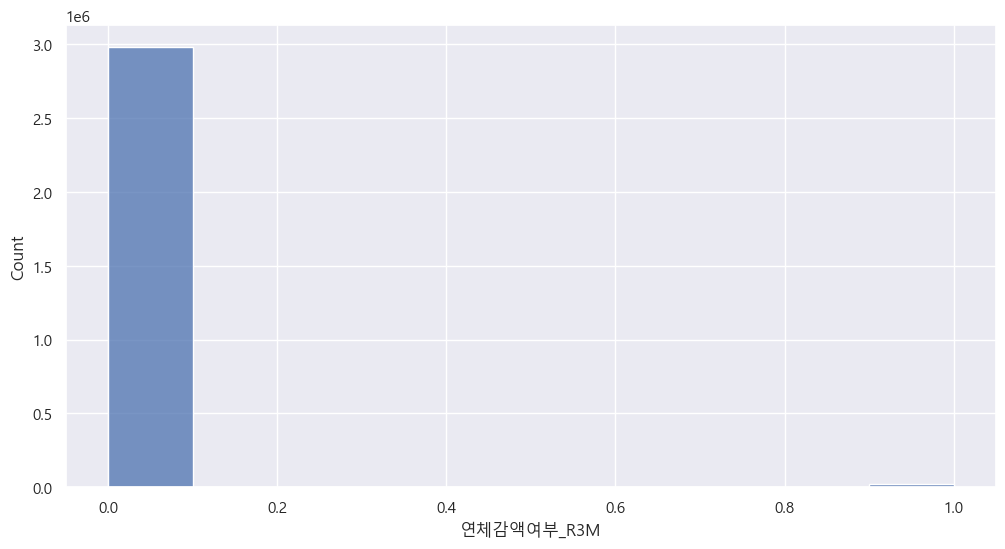

In [361]:

sns.histplot(data=combined_df, x='연체감액여부_R3M', bins = 10)
plt.show()

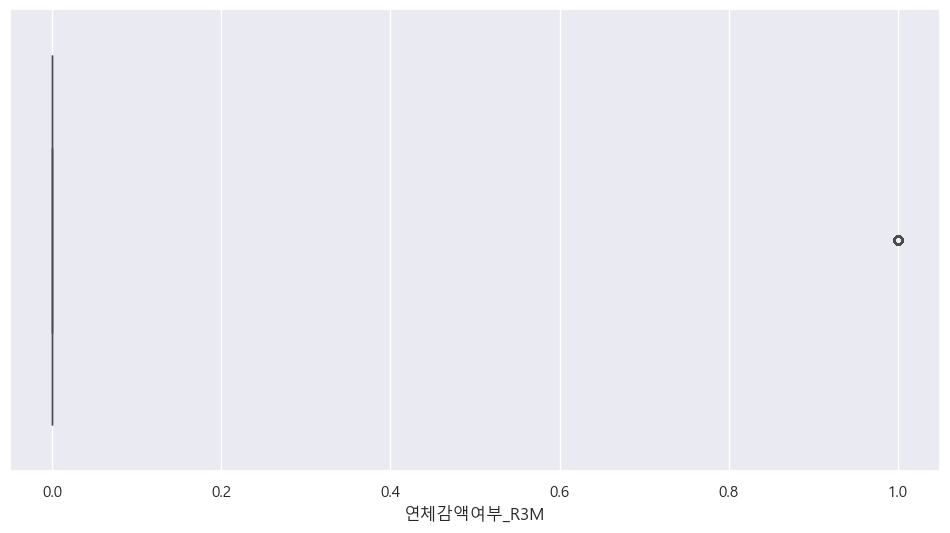

In [362]:
sns.boxplot(x=combined_df['연체감액여부_R3M'])
plt.show()

- 범주형, 감액된 사람이 매우 적음

### 한도심사요청건수	
- 카드 한도 증액 심사 요청 건수

In [364]:
combined_df['한도심사요청건수'].value_counts()

한도심사요청건수
0회      2999886
1회이상        114
Name: count, dtype: int64

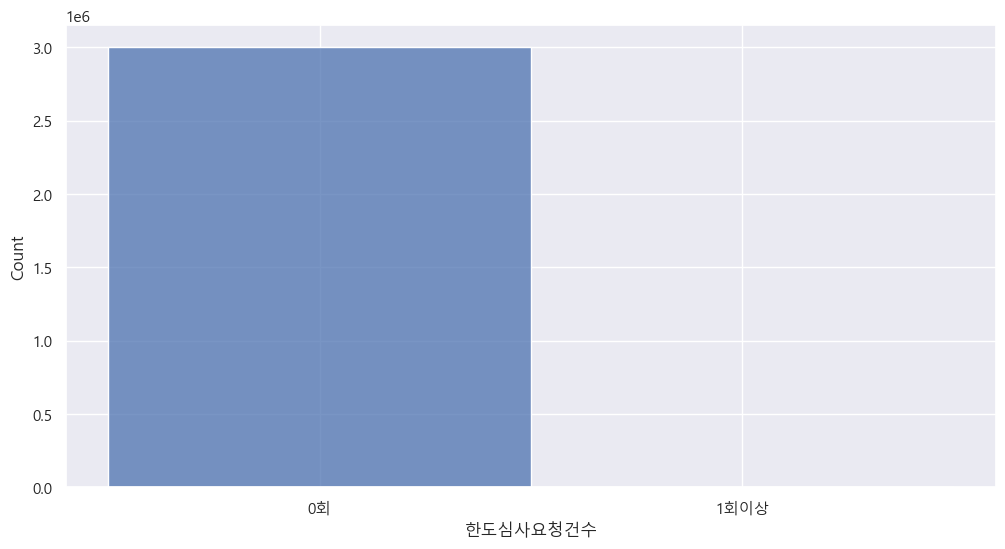

In [383]:

sns.histplot(data=combined_df, x='한도심사요청건수', bins = 10)
plt.show()

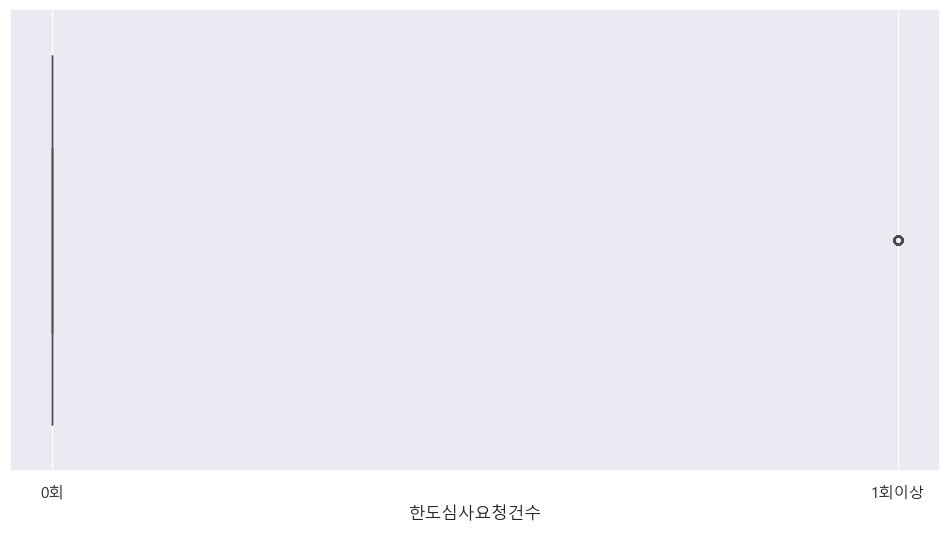

In [384]:
sns.boxplot(x=combined_df['한도심사요청건수'])
plt.show()

- 범주형
- 증액심사 요청이 114건으로 아주 적음

### 한도요청거절건수	
- 한도 증액 요청 거절 건수

In [386]:
combined_df['한도요청거절건수'].value_counts()

한도요청거절건수
0    2999925
1         75
Name: count, dtype: int64

<Axes: xlabel='한도요청거절건수', ylabel='Density'>

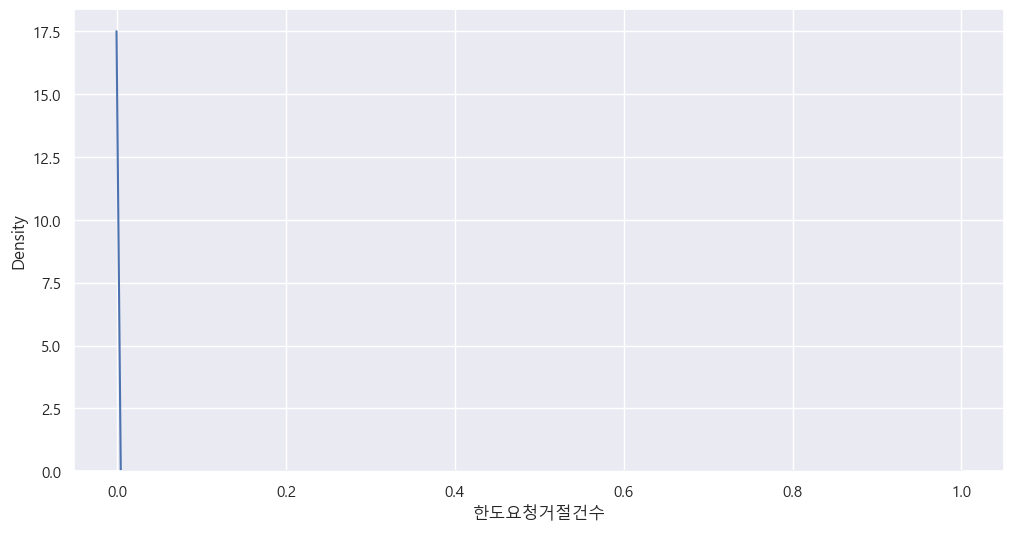

In [387]:
sns.kdeplot(data=combined_df, x='한도요청거절건수')

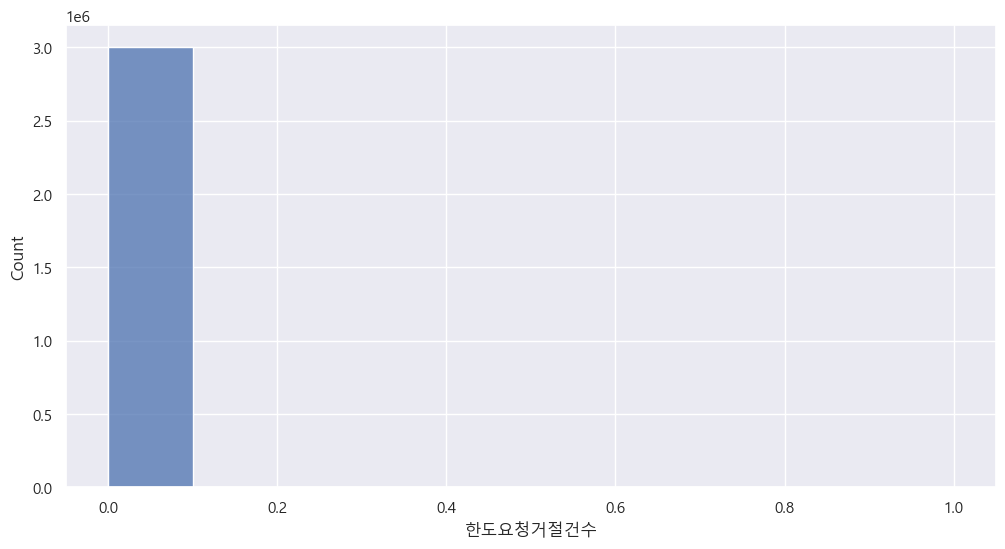

In [388]:

sns.histplot(data=combined_df, x='한도요청거절건수', bins = 10)
plt.show()

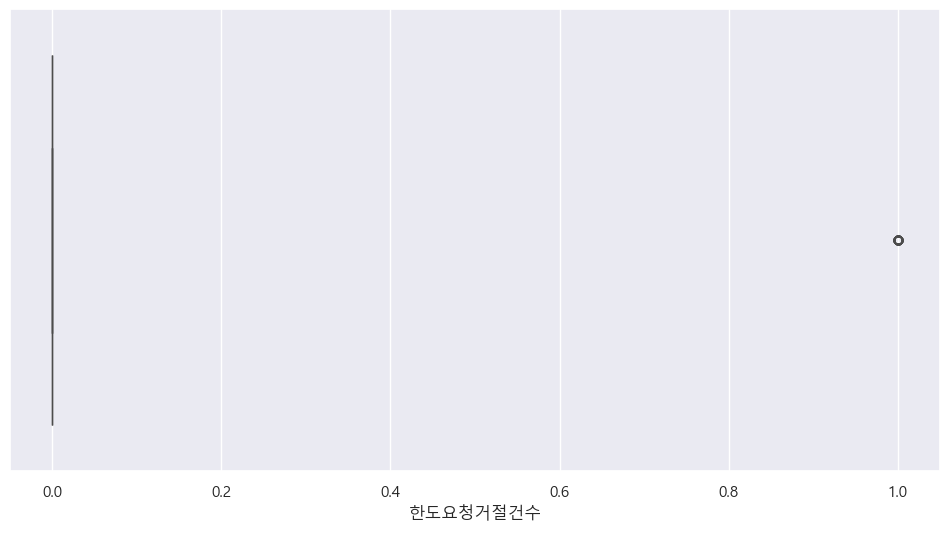

In [389]:
sns.boxplot(x=combined_df['한도요청거절건수'])
plt.show()

- 범주형
- 증액심사 요청 거절 수 75건으로 매우 적음

### 한도심사요청후경과월	
- 마지막 한도 심사 요청 이후 경과 개월 수

In [397]:
combined_df['한도심사요청후경과월'].value_counts()

한도심사요청후경과월
3    2999905
1         61
2         33
0          1
Name: count, dtype: int64

In [539]:
a1 = all_df.query('한도심사요청후경과월 != 0')
sns.countplot(data=a1, x='한도심사요청후경과월')
plt.show()

NameError: name 'all_df' is not defined

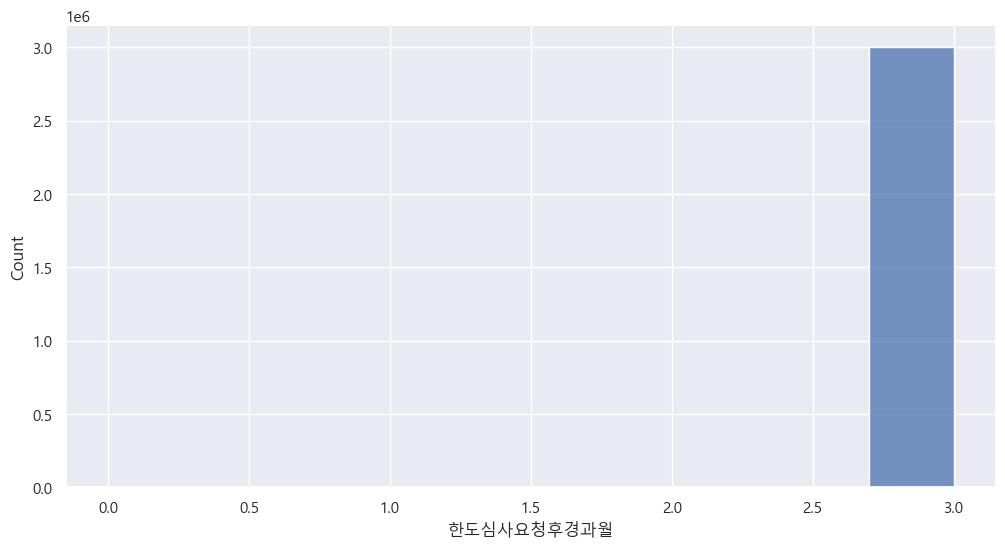

In [400]:

sns.histplot(data=combined_df, x='한도심사요청후경과월', bins = 10)
plt.show()

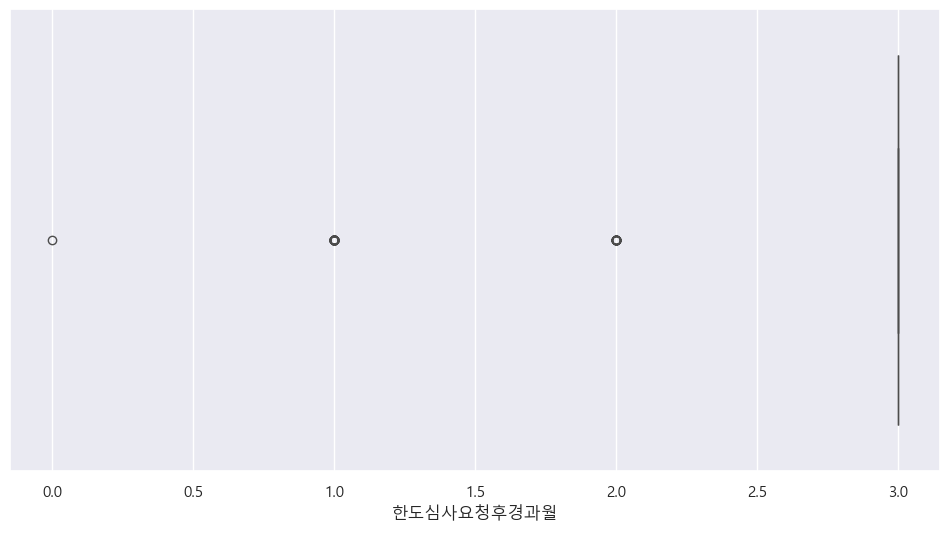

In [401]:
sns.boxplot(x=combined_df['한도심사요청후경과월'])
plt.show()

- 범주형
- 3개월이 대부분
- 1개월이 그 다음이고 2, 당원 순 


### 한도심사거절후경과월	
- 마지막 한도 심사 거절 이후 경과 개월 수

In [403]:
combined_df['한도심사거절후경과월'].value_counts()

한도심사거절후경과월
3    2999934
1         43
2         21
0          2
Name: count, dtype: int64

<Axes: xlabel='한도심사거절후경과월', ylabel='Density'>

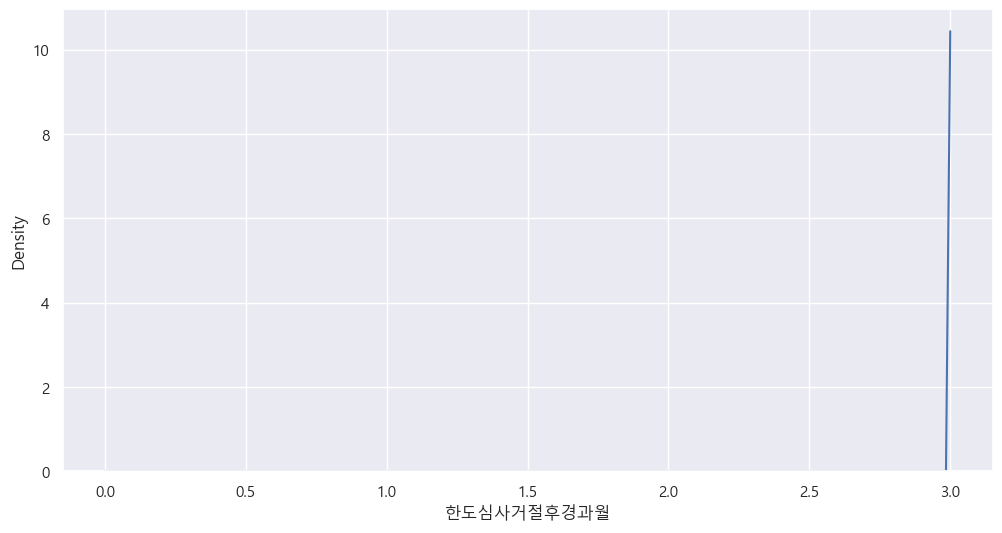

In [404]:
sns.kdeplot(data=combined_df, x='한도심사거절후경과월')

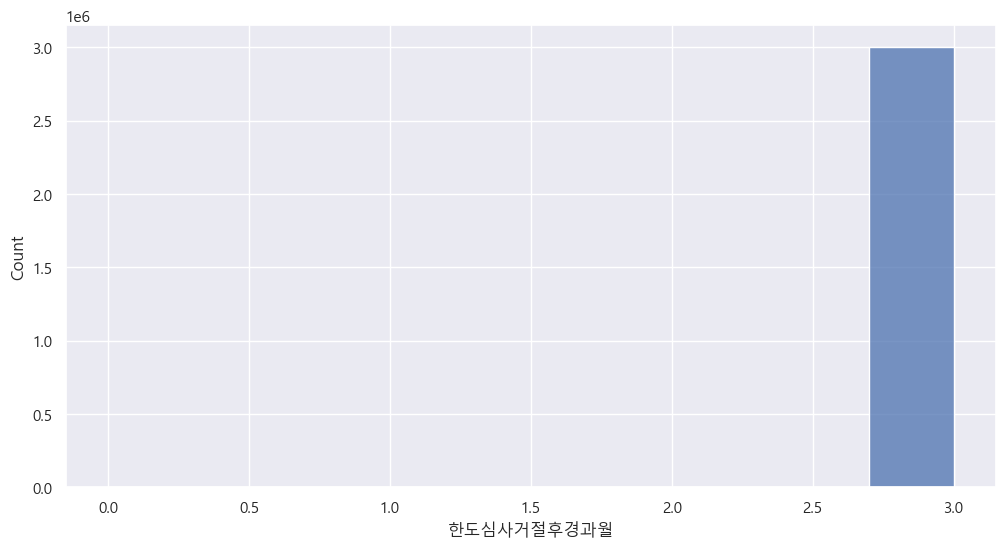

In [405]:

sns.histplot(data=combined_df, x='한도심사거절후경과월', bins = 10)
plt.show()

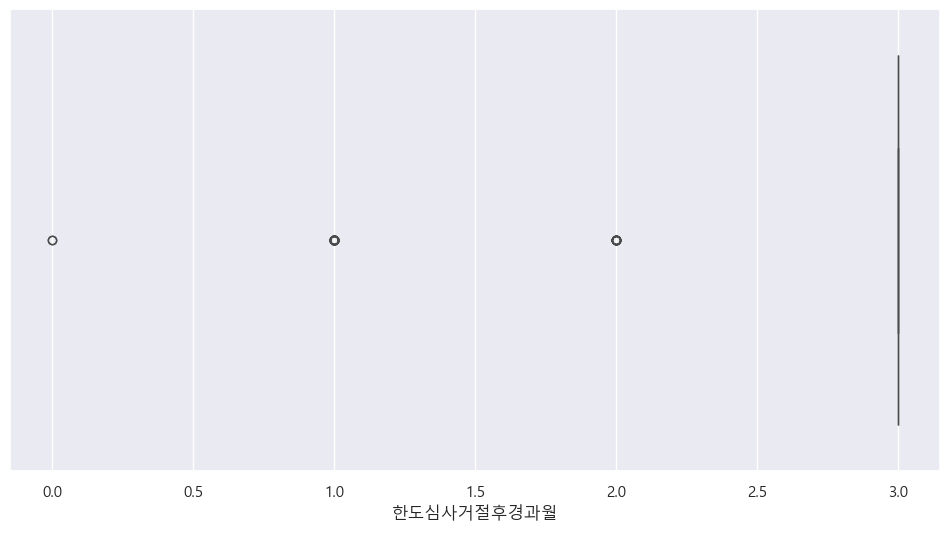

In [406]:
sns.boxplot(x=combined_df['한도심사거절후경과월'])
plt.show()

- 범주형
- 3개월이 대부분
- 1개월이 그 다음이고 2, 당원 순 

### 시장단기연체여부_R6M	
- 외부 정보 기준 단기 연체 여부 (최근 6개월)

In [408]:
combined_df['시장단기연체여부_R6M'].value_counts()

시장단기연체여부_R6M
0    2999938
1         62
Name: count, dtype: int64

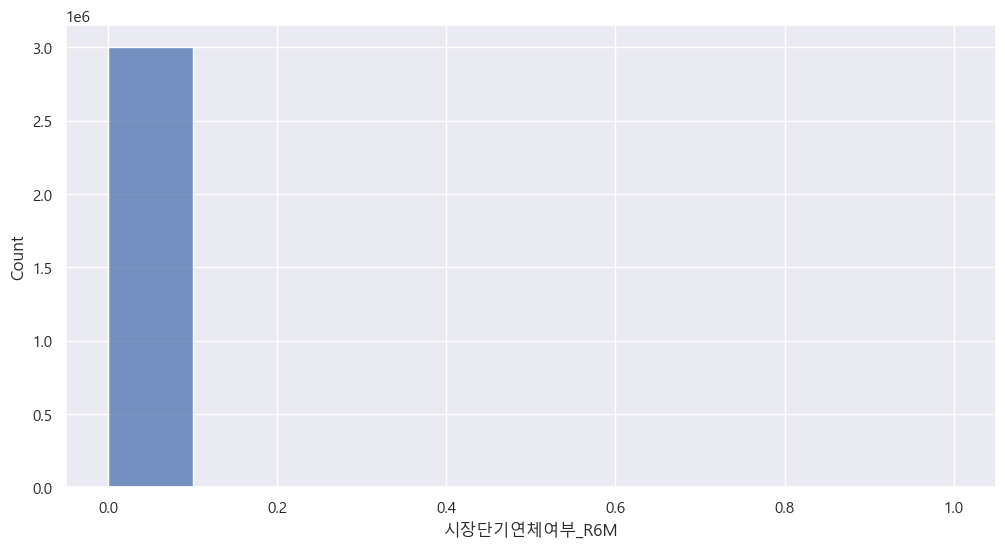

In [410]:

sns.histplot(data=combined_df, x='시장단기연체여부_R6M', bins = 10)
plt.show()

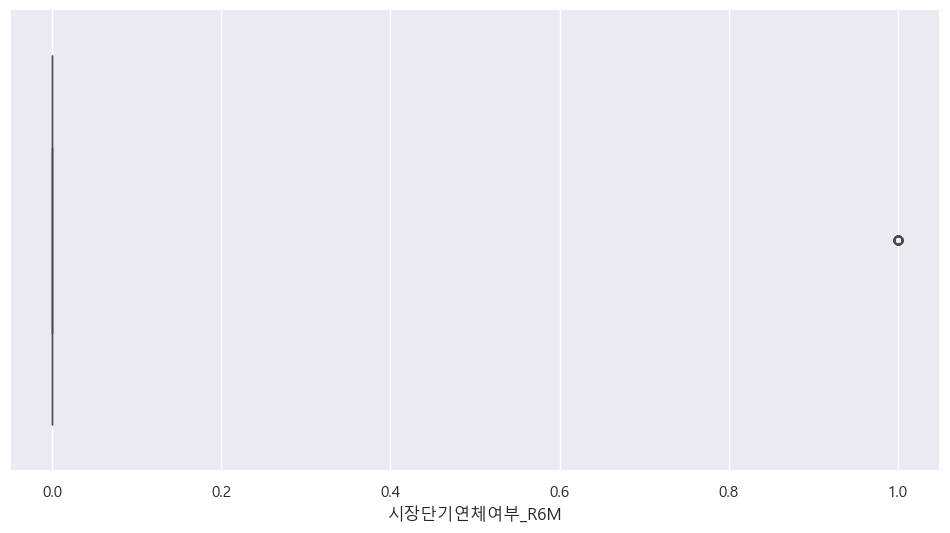

In [411]:
sns.boxplot(x=combined_df['시장단기연체여부_R6M'])
plt.show()

- 범주형
- 0이 과반수
- 1은 62건밖에 존재하지 않음



### 시장단기연체여부_R3M	
- 외부 정보 기준 단기 연체 여부 (최근 3개월)

In [413]:
combined_df['시장단기연체여부_R3M'].value_counts()

시장단기연체여부_R3M
0    2999979
1         21
Name: count, dtype: int64

<Axes: xlabel='시장단기연체여부_R3M', ylabel='Density'>

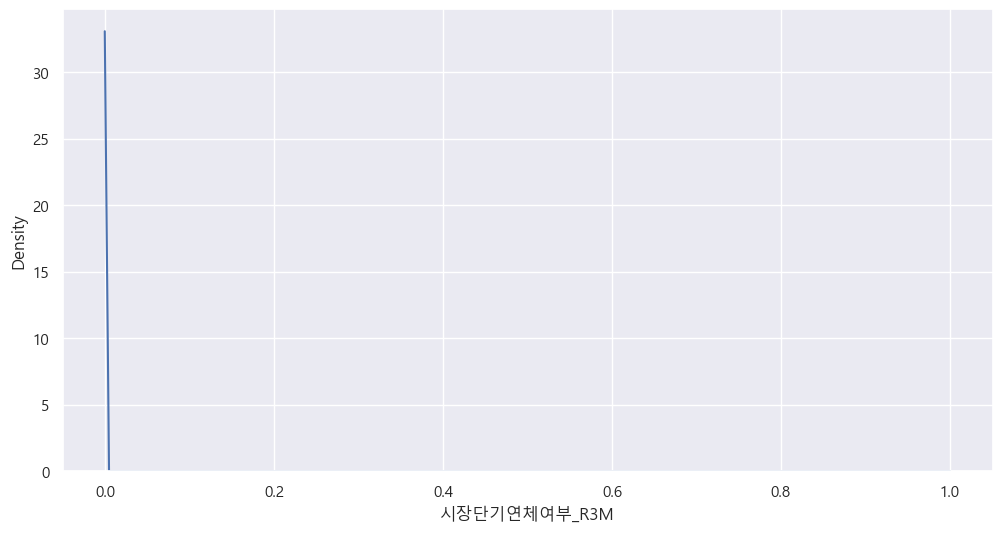

In [414]:
sns.kdeplot(data=combined_df, x='시장단기연체여부_R3M')

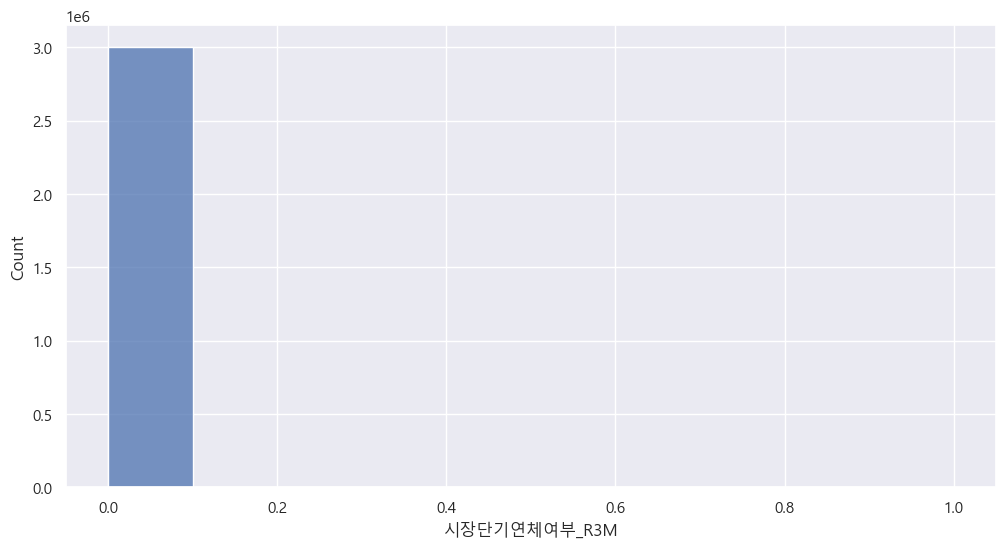

In [415]:

sns.histplot(data=combined_df, x='시장단기연체여부_R3M', bins = 10)
plt.show()

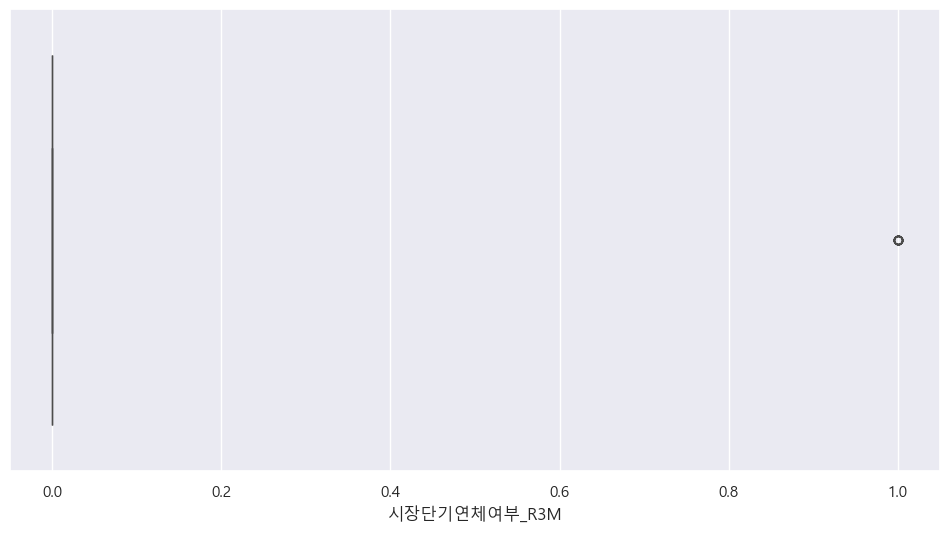

In [416]:
sns.boxplot(x=combined_df['시장단기연체여부_R3M'])
plt.show()

- 범주형
- 0이 과반수
- 1은 21건밖에 존재하지 않음

### 시장연체상환여부_R6M	
- 외부 연체 상환 여부 (최근 6개월)

In [424]:
combined_df['시장연체상환여부_R6M'].value_counts()

시장연체상환여부_R6M
0    2999998
1          2
Name: count, dtype: int64

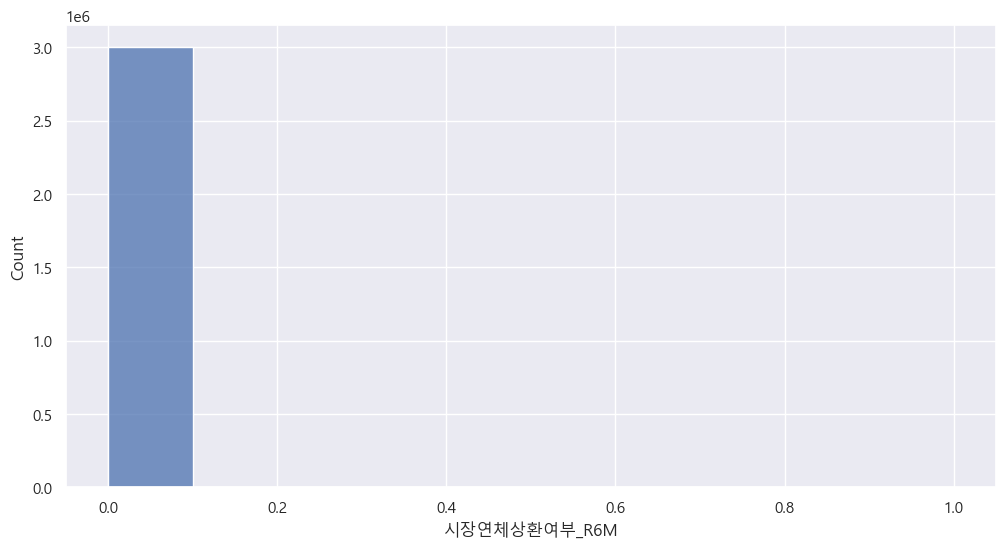

In [427]:

sns.histplot(data=combined_df, x='시장연체상환여부_R6M', bins = 10)
plt.show()

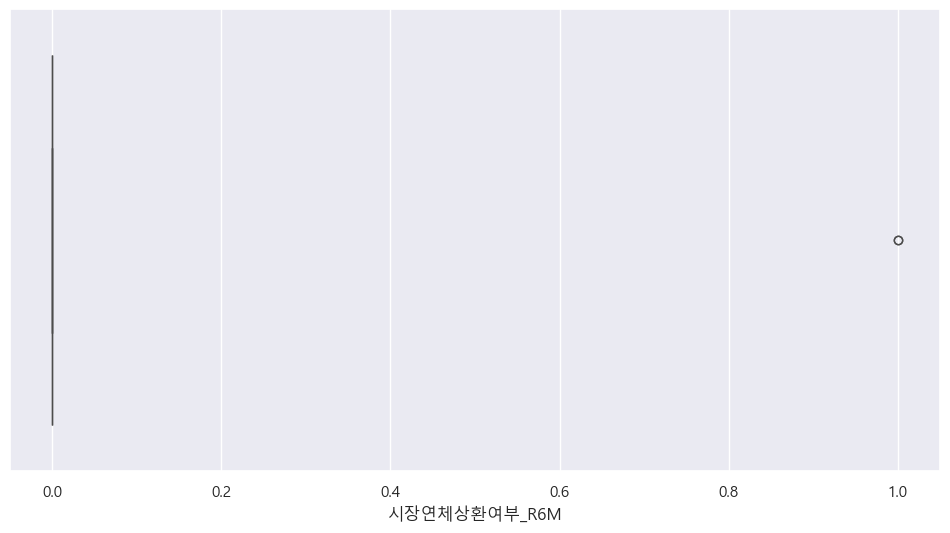

In [428]:
sns.boxplot(x=combined_df['시장연체상환여부_R6M'])
plt.show()

- 0이 과반수
- 1이 2건

### 시장연체상환여부_R3M	
- 외부 연체 상환 여부 (최근 3개월)

In [430]:
combined_df['시장연체상환여부_R3M'].value_counts()

시장연체상환여부_R3M
0    3000000
Name: count, dtype: int64

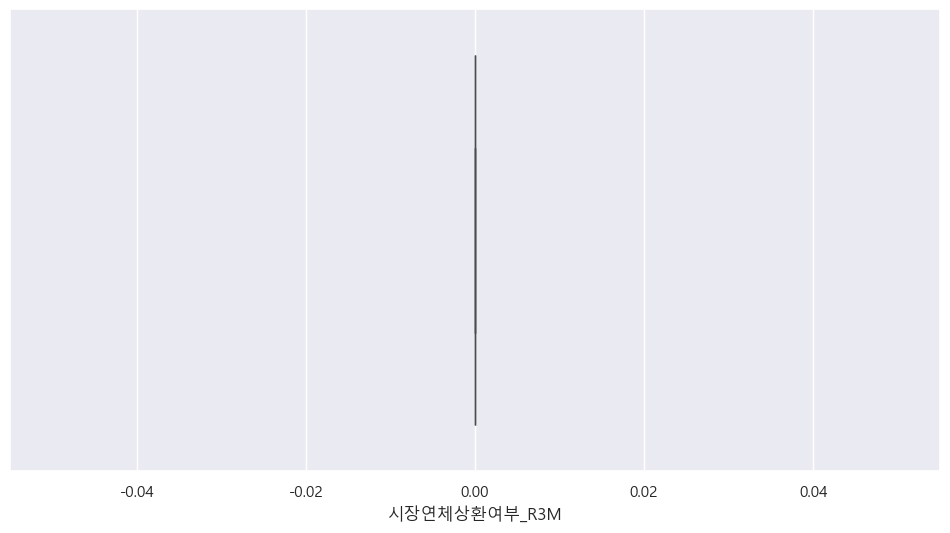

In [433]:
sns.boxplot(x=combined_df['시장연체상환여부_R3M'])
plt.show()

- 0만 존재함
- 삭제해도 영향 없을 듯 

### rv최초시작후경과일	
- 리볼빙 최초 신청일 이후 경과 일수

In [120]:
combined_df['rv최초시작후경과일'].value_counts()

rv최초시작후경과일
99999999    2439259
331            4099
330            4051
329            4051
332            3986
             ...   
4778              1
2167              1
1723              1
2548              1
732               1
Name: count, Length: 1752, dtype: int64

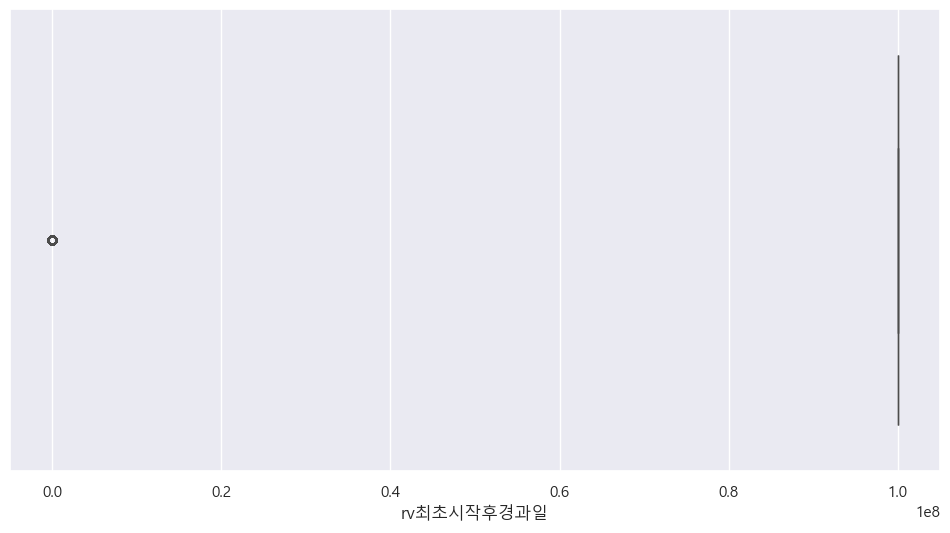

In [117]:
sns.boxplot(x=combined_df['rv최초시작후경과일'])
plt.show()

- 99999999가 대부분이며 어떤 데이터값인지 알 수 없음. 

## 결측치가 존재하는 컬럼

### RV전환가능여부 
-  리볼빙 전환가능여부

In [451]:
combined_df['RV전환가능여부'].isna().sum()

37107

In [460]:
combined_df['RV전환가능여부'].describe()

count     2962893
unique          2
top             Z
freq      2454682
Name: RV전환가능여부, dtype: object

In [464]:
combined_df['RV전환가능여부'].value_counts()

RV전환가능여부
Z    2454682
N     508211
Name: count, dtype: int64

- 결측치의 수가 적으므로 채우는 방법도 고려가능 

### RV신청일자

In [453]:
combined_df['RV신청일자'].isna().sum()

2438754

- 결측치가 24만개로 너무 많아 제거 고려

## 정리

### 최초한도금액:  
- 0원인 사람이 가장 많다
- 0 이외에 10000과 37000쪽에 주로 분포하고 있다. 
- 평균은 26567.457

### 카드이용한도금액¶: 
- 0원인 사람이 가장 많다
- 0 제외하면 평균은 53815

### CA한도금액 : 현금서비스 한도금액 
- 0원인 사람이 가장 많다. 한도금액이 증가할 수록 도수가 줄어든다. 
- 8,000원, 12,000원, 18,000원, 30,000원, 38,000원, 50,000원 부근에서 밀도 상승이 보임
- 일부 고객은 50,000원 이상 ~ 최대 70,000원까지도 CA한도가 부여되어 있음

### CL이자율_할인전: 
- 카드론 이자율, 22.999954가 도수가 가장 많음
- 약 10.5%, 약 11.8%, 약 15.1%, 약 15.4%, 약 17.8%, 약 23%에 주로 분포함
- 15% 부근에 가장 높은 밀도가 존재 이 구간이 가장 흔한 카드론 이자율일 수 있음


### 일시상환론한도금액: 
- 대부분의 고객에게 일시상환론 한도 자체가 없거나, 0으로 설정되어 있다
- 약 50,000원, 100,000원, 200,000원 부근에 뚜렷한 봉우리

### 월상환론한도금액:
- 0원이 가장 높음. 카드 고객의 다수가 월상환론 한도 자체를 보유하지 않음
- 약 50,000원, 100,000원, 150,000원, 180,000원, 200,000원, 240,000원 봉우리 존재
- 15만 이상, 최대 25만 이상까지 한도 보유 고객이 소수 존재


### CA이자율_할인전: 
- 14.22%에서 가장 많이 존재
- 14%대 이자율(14~15%)이 가장 많으며, 약 175만건 이상



### RV일시불이자율_할인전:
- 10.249980 값이 가장 많이 존재함
- 10.2% 부근에 가장 높은 봉우리가 존재함
- 이후 점점 완만하게 감소


### RV현금서비스이자율_할인전:
- 22.99%에 가장 큰 도수
- 13.5% 부근에 압도적인 최고봉
- 13~14% 구간에 약 190만 건 이상 집중됨

### RV약정청구율: 
- 0에 가장 많이 분포하며 99.999800이 두번째인데 확인 필요
- 0과 99.999800을 제외할 경우 kdeplot이 정규분포에 가까운 모습을 보여주며 약 21%에서 가장 높게 나타남 

### RV최소결제비율: 
- 9.99998%, 19.99996% 순으로 분포 
연속분포처럼 보이는 범주형 데이터 
약 10%에서 가장 높고 20%, 15%순

### 자발한도감액횟수_R12M:
- 범주형 데이터로 한도하향횟수 0회가 가장 많고 아주 많은 차이로 1회이상이 2770건 존재함


### 자발한도감액금액_R12M: 
- 감액금액의 컬럼인데 0,1,2의 값으로 이루어짐


### 자발한도감액후경과월:
- 범주형
- 12개월이 지난 경우가 가장 많이 존재했음
- 당월의 경우 348건으로 아주 적게 존재 

### 강제한도감액횟수_R12M:
- 0회가 가장 많았으며
- 1회가 그 다음으로 많았음. 하지만 0회와의 차이가 매우 큼

 
### 강제한도감액금액_R12M: 
- 마찬가지로 0이 가장 많았으며 1 2 6 4 7 9의 순서인데 감액금액인데 이상한 결과치 
- 범주형처럼 나타남


### 강제한도감액후경과월:
- 범주형임
- 12개월이 가장 많음 9개월, 10개월, 11개월순 


### 한도증액횟수_R12M:
- 범주형으로 0회와 1회이상 중 0회가 눈에띄게 많음


### 한도증액금액_R12M: 
- 금액총액 데이터지만 0 1 2 3으로 나타남 
0이 가장 높음


### 한도증액후경과월: 
- 범주형
- 12개월 경과가 가장 많이 존재 
- 12개월을 제외하면 3~8개월은 약 41000에서 주로 분포, 
- 나머지는 3~6000


### 상향가능한도금액:
- 상향가능 한도금액인데 금액이 아니라 0~19의 값이 도출

### 상향가능CA한도금액:
- 범주형 (0 1 2 3 4)
- 0이 가장 많음

### 카드론동의여부:
- Y/N으로 나누어졌고 Y는 2406657개, N은 593343개

### 월상환론상향가능한도금액
- 상향금액 0이 가장 높고 18, 16, 4 순, 범주형처럼 보임

### 일시불ONLY전환가능여부: 
- 1과 0의 범주형
- 1이 많음 
- 1이 Y인지 0이 Y인지 명세서에서는 판단불가

### 카드이용한도금액_B1M:
- 0이 가장 많고 10000이 그 다음
- 0~65000정도까지 주로 분포되어있음
 
### 카드이용한도금액_B2M:
- B1M과 비슷한 분포를 보여줌


### 특별한도보유여부_R3M: 
- 범주형, 0이 2999839개 1은 161개로 아주 적은 수 


### 연체감액여부_R3M:
- 범주형, 감액된 사람이 매우 적음


### 한도심사요청건수: 
- 범주형
- 증액심사 요청이 114건으로 아주 적음

### 한도요청거절건수: 
- 범주형
- 증액심사 요청 거절 수 75건으로 매우 적음

### 한도심사요청후경과월: 
- 범주형
- 3개월이 대부분
- 1개월이 그 다음이고 2, 당원 순 

### 한도심사거절후경과월:
- 범주형
- 3개월이 대부분
- 1개월이 그 다음이고 2, 당원 순 


### 시장단기연체여부_R6M:
- 범주형
- 0이 과반수
- 1은 62건밖에 존재하지 않음


### 시장단기연체여부_R3M

- 범주형
- 0이 과반수
- 1은 21건밖에 존재하지 않음


### 시장연체상환여부_R6M
- 0이 과반수
- 1이 2건

### 시장연체상환여부_R3M
- 0만 존재함
- 삭제해도 영향 없을 듯 

### rv최초시작후경과일
- 99999999가 대부분이며 어떤 데이터값인지 알 수 없음. 제외하고는 331이 더 많음


### RV전환가능여부
- 결측치의 수가 적으므로 채우는 방법도 고려가능 

### RV신청일자
- 결측치가 24만개로 너무 많아 제거 고려